# Project Tumor Trace: MRI-Based AI for Breast Cancer Detection

## Loading libraries 

In [15]:
import kagglehub

classification_roi_path = kagglehub.dataset_download('kumudhasija/classification-roi')

print(f"The dataset is downloaded to: {classification_roi_path}")

The dataset is downloaded to: /kaggle/input/classification-roi


In [2]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets , transforms
import torchvision.models as models
from PIL import Image
import torchvision.transforms as transforms

## Data Transformation Function for Augmented and Original Datasets

In [9]:
# Resizing images
transformAug = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.CenterCrop(224),
    transforms.ColorJitter(brightness=2),
    transforms.RandomResizedCrop(size=(224, 224), antialias=True),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
])

In [10]:
from torchvision import datasets

root_path = '/kaggle/input/classification-roi'

In [11]:

train_dataset = datasets.ImageFolder(f'{root_path}/train/', transform=transformAug)
test_dataset = datasets.ImageFolder(f'{root_path}/test/', transform=transform)
val_dataset = datasets.ImageFolder(f'{root_path}/val/', transform=transform)

In [12]:
batch_size = 32

## Loading data

In [14]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

## Counting number of images

In [10]:
from collections import Counter
print("Train Dataset Class Distribution:")
print(dict(Counter(sample_tup[1] for sample_tup in train_dataset.imgs)))

print("Test Dataset Class Distribution:")
print(dict(Counter(sample_tup[1] for sample_tup in test_dataset.imgs)))

print("Val Dataset Class Distribution:")
print(dict(Counter(sample_tup[1] for sample_tup in val_dataset.imgs)))

Train Dataset Class Distribution:
{0: 5559, 1: 14875}
Test Dataset Class Distribution:
{0: 1938, 1: 4913}
Val Dataset Class Distribution:
{0: 408, 1: 1581}


## Displaying sample images

In [11]:
classes = ('Melignant', 'Benign')

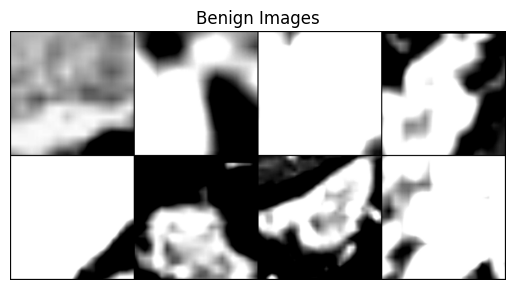

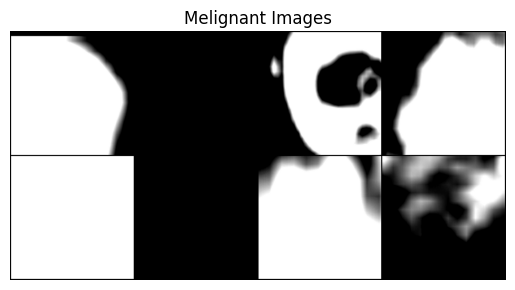

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

def show_images_by_class(data_loader, classes, target_classes=['Benign', 'Melignant'], num_images=8):
    dataiter = iter(data_loader)
    images, labels = next(dataiter)

    benign_images = []
    melignant_images = []

    for i in range(len(labels)):
        if classes[labels[i]] == target_classes[0]:
            benign_images.append(images[i])
        elif classes[labels[i]] == target_classes[1]:
            melignant_images.append(images[i])

    if benign_images:
        benign_grid = torchvision.utils.make_grid(torch.stack(benign_images[:num_images]), nrow=4)
        imshow(benign_grid, title='Benign Images')

    if melignant_images:
        melignant_grid = torchvision.utils.make_grid(torch.stack(melignant_images[:num_images]), nrow=4)
        imshow(melignant_grid, title='Melignant Images')

show_images_by_class(trainloader, classes, target_classes=['Benign', 'Melignant'], num_images=8)

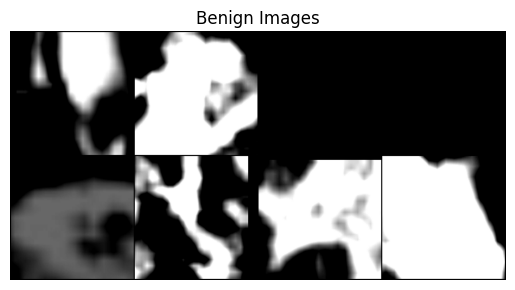

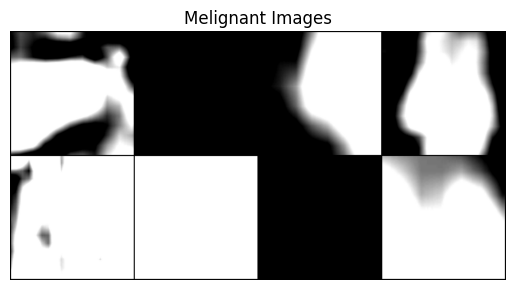

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

def show_images_by_class(data_loader, classes, target_classes=['Benign', 'Melignant'], num_images=8):
    dataiter = iter(data_loader)
    images, labels = next(dataiter)

    benign_images = []
    melignant_images = []

    for i in range(len(labels)):
        if classes[labels[i]] == target_classes[0]:
            benign_images.append(images[i])
        elif classes[labels[i]] == target_classes[1]:
            melignant_images.append(images[i])

    if benign_images:
        benign_grid = torchvision.utils.make_grid(torch.stack(benign_images[:num_images]), nrow=4)
        imshow(benign_grid, title='Benign Images')

    if melignant_images:
        melignant_grid = torchvision.utils.make_grid(torch.stack(melignant_images[:num_images]), nrow=4)
        imshow(melignant_grid, title='Melignant Images')

show_images_by_class(trainloader, classes, target_classes=['Benign', 'Melignant'], num_images=8)

## VGG 16 Model

In [14]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 218MB/s]  


In [15]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [16]:
input_image = Image.open(f"{root_path}/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg").convert('RGB')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

model.eval()  
with torch.no_grad():
    output = model(input_batch)

In [17]:
print(output)

tensor([[ 1.7723e-01,  2.8148e+00, -7.6697e-01,  2.8151e-01, -3.1437e-01,
          2.3726e+00, -3.5673e+00, -1.6575e+00, -2.1122e+00, -2.0490e+00,
          1.7995e+00, -3.0830e+00, -2.9945e+00, -1.8305e+00, -2.1870e+00,
         -1.9123e+00, -1.3854e+00, -2.7219e+00, -2.4119e+00, -2.4103e+00,
         -1.3219e+00, -1.7210e+00, -2.2531e+00, -7.6893e-01, -2.1583e+00,
         -4.6211e-01,  1.4578e+00,  4.3685e-01,  1.2775e+00,  3.9830e+00,
         -1.7718e+00,  1.3678e+00,  1.4397e+00, -5.0775e-01,  4.7667e-01,
         -8.5749e-01, -1.0462e+00, -4.2227e+00,  1.7013e+00, -3.7241e-01,
         -5.8306e-01,  4.2426e-01, -1.2109e-01,  1.9852e+00, -3.7804e-01,
         -5.6655e-01, -1.5815e+00,  2.1921e+00, -1.6166e+00, -3.6963e+00,
         -3.6403e+00,  1.7829e+00,  1.4911e+00,  5.0929e-01, -1.7688e-01,
         -9.5112e-01, -6.8134e-01, -2.3637e+00, -4.2169e+00,  4.3030e+00,
          1.5067e+00, -1.2390e+00,  1.1251e+00,  2.7263e+00,  3.1482e+00,
         -5.5739e-02,  2.5862e+00, -2.

In [18]:
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([9.1300e-05, 1.2762e-03, 3.5515e-05, 1.0133e-04, 5.5844e-05, 8.2014e-04,
        2.1590e-06, 1.4576e-05, 9.2507e-06, 9.8543e-06, 4.6239e-04, 3.5041e-06,
        3.8284e-06, 1.2261e-05, 8.5846e-06, 1.1298e-05, 1.9135e-05, 5.0281e-06,
        6.8552e-06, 6.8662e-06, 2.0389e-05, 1.3680e-05, 8.0348e-06, 3.5445e-05,
        8.8342e-06, 4.8174e-05, 3.2857e-04, 1.1836e-04, 2.7437e-04, 4.1050e-03,
        1.3002e-05, 3.0028e-04, 3.2265e-04, 4.6024e-05, 1.2317e-04, 3.2441e-05,
        2.6861e-05, 1.1210e-06, 4.1913e-04, 5.2694e-05, 4.2686e-05, 1.1688e-04,
        6.7751e-05, 5.5676e-04, 5.2399e-05, 4.3396e-05, 1.5728e-05, 6.8470e-04,
        1.5186e-05, 1.8976e-06, 2.0071e-06, 4.5479e-04, 3.3967e-04, 1.2726e-04,
        6.4074e-05, 2.9542e-05, 3.8690e-05, 7.1937e-06, 1.1275e-06, 5.6527e-03,
        3.4501e-04, 2.2151e-05, 2.3556e-04, 1.1682e-03, 1.7814e-03, 7.2326e-05,
        1.0154e-03, 6.0671e-06, 1.9004e-03, 2.0687e-05, 1.9973e-05, 3.3435e-04,
        4.5844e-05, 4.8916e-03, 3.9988e-

## Plot the pixel value range from an image

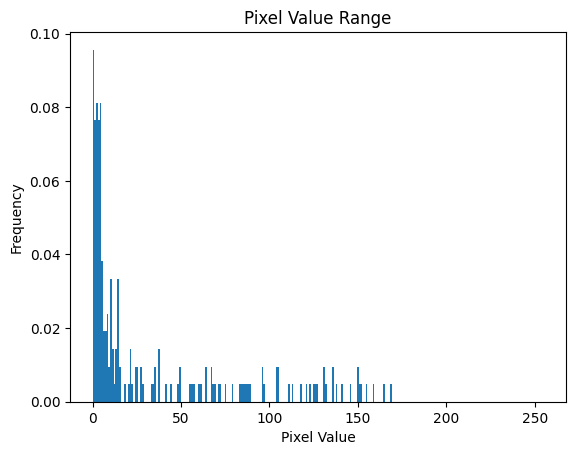

In [19]:
image_path = f'{root_path}/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'
image = Image.open(image_path).convert('L')
image_array = np.array(image)

plt.hist(image_array.ravel(), bins=256, range=(0, 255), density=True)
plt.title('Pixel Value Range')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

## Ploting HOG visualization graph of Image

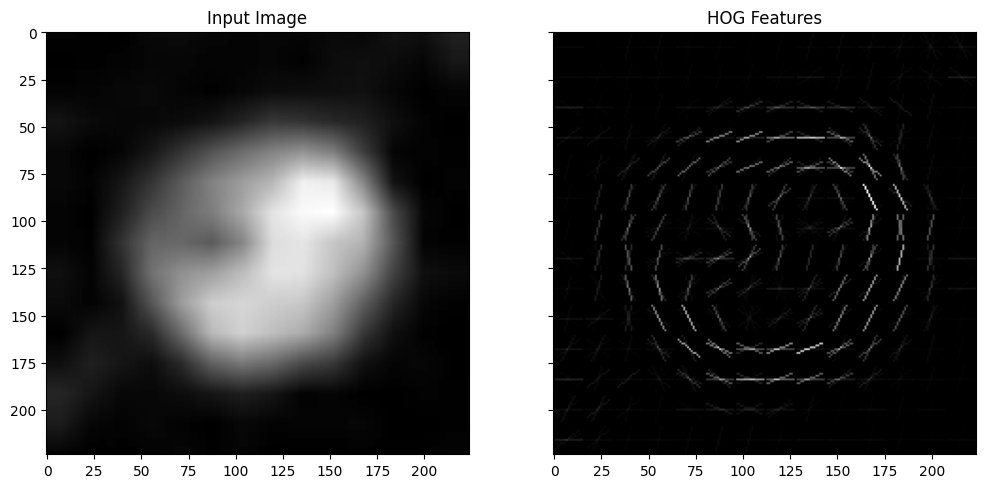

In [20]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
from PIL import Image

image_path = f'{root_path}/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'
input_image = Image.open(image_path).convert('L')
preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
image_tensor = preprocess(input_image)
image_numpy = image_tensor.numpy().squeeze()

hog_features, hog_image = hog(image_numpy, pixels_per_cell=(16, 16),
                              cells_per_block=(2, 2), visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax[0].imshow(image_numpy, cmap=plt.cm.gray)
ax[0].set_title('Input Image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax[1].set_title('HOG Features')

plt.show()

## Sobel Operator

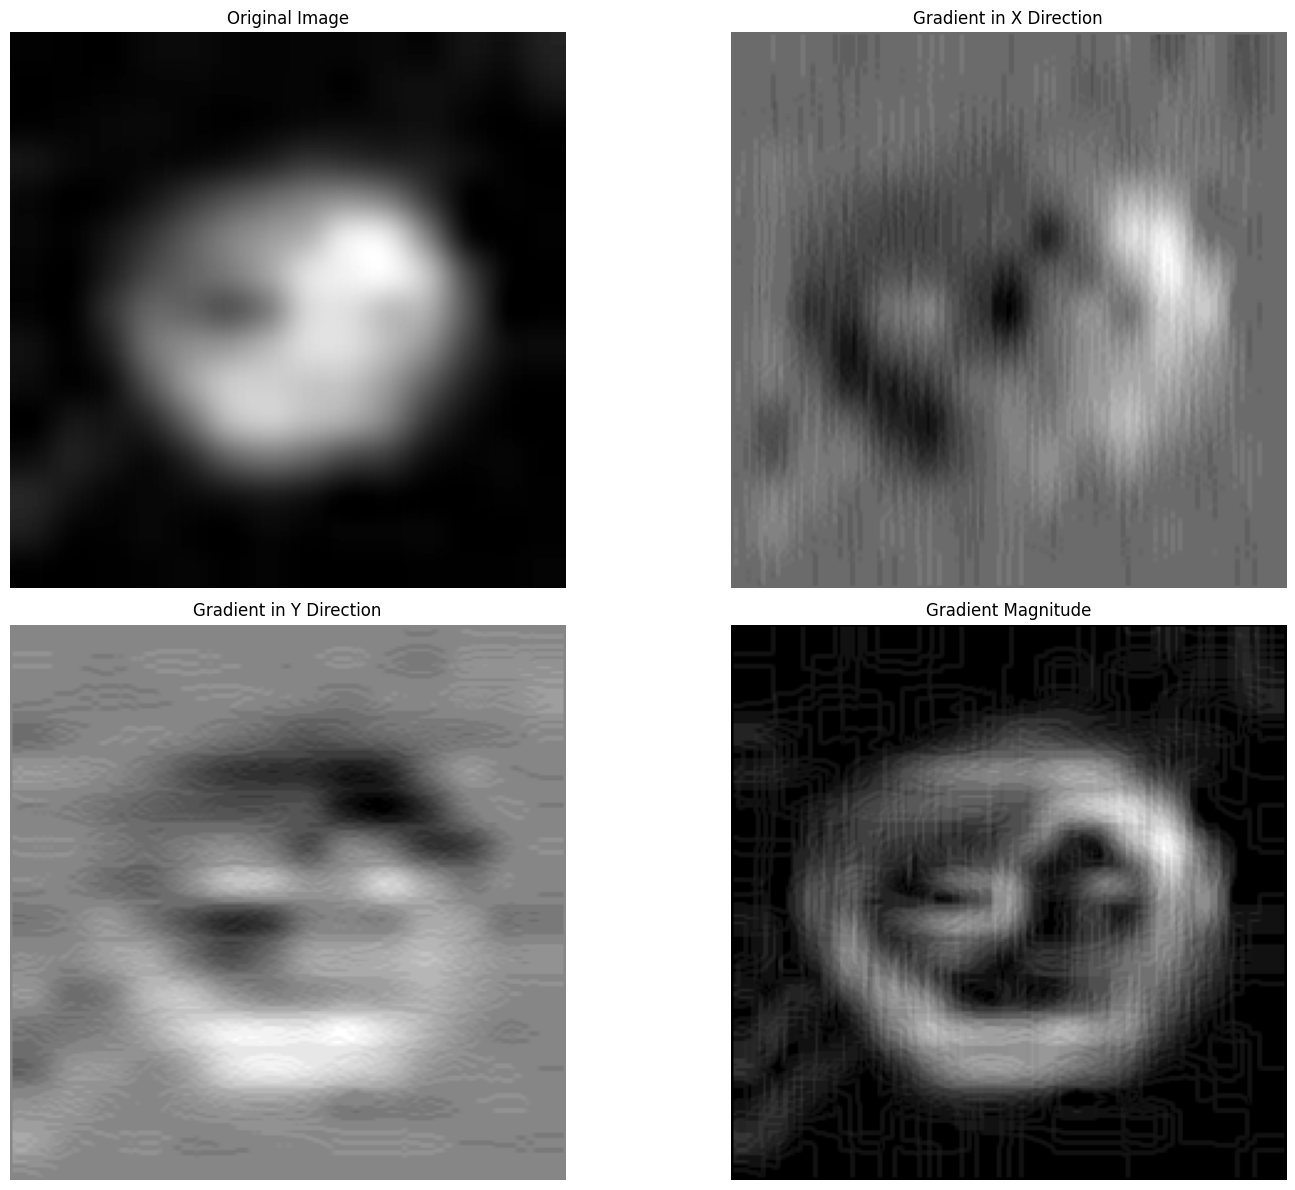

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def sobel_operator(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)

    sobel_x = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])

    sobel_y = np.array([[1, 2, 1],
                         [0, 0, 0],
                         [-1, -2, -1]])

    rows, cols = img_array.shape
    Gx = np.zeros(img_array.shape)
    Gy = np.zeros(img_array.shape)

    for i in range(1, rows-1):
        for j in range(1, cols-1):
            region = img_array[i-1:i+2, j-1:j+2]
            Gx[i, j] = np.sum(sobel_x * region)
            Gy[i, j] = np.sum(sobel_y * region)

    G = np.sqrt(Gx**2 + Gy**2)
    G = (G / G.max()) * 255
    G = G.astype(np.uint8)

    plt.figure(figsize=(16, 12))
    
    plt.subplot(2, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(Gx, cmap='gray')
    plt.title('Gradient in X Direction')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(Gy, cmap='gray')
    plt.title('Gradient in Y Direction')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(G, cmap='gray')
    plt.title('Gradient Magnitude')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

sobel_operator(f'{root_path}/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg')

## Local Binary Pattern 

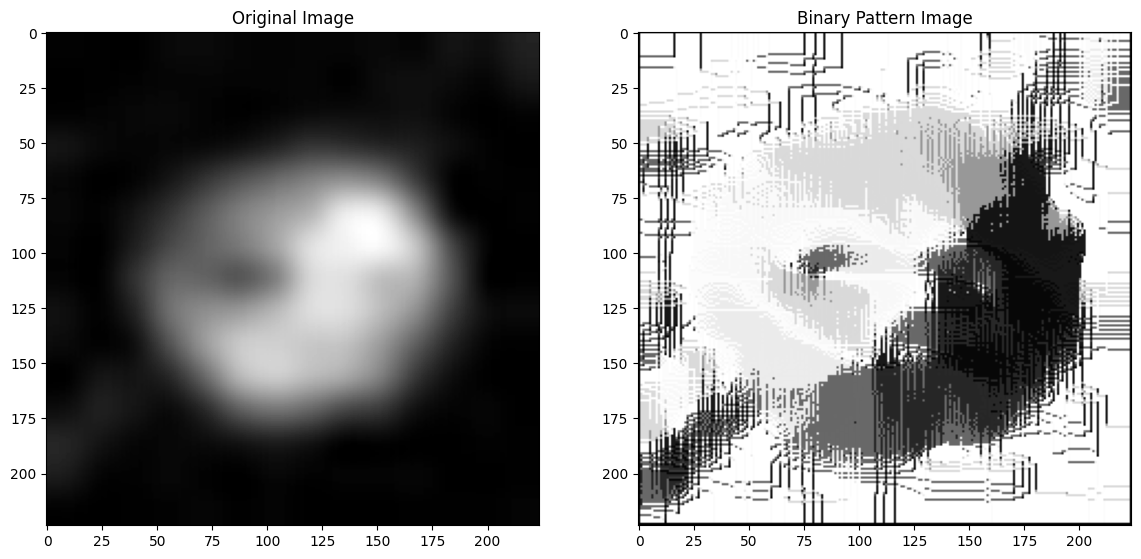

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def sobel_operators(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)
    
    rows, cols = img_array.shape
    G = np.zeros(img_array.shape)
    
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            surr = img_array[i-1:i+2, j-1:j+2].T.flatten()
            skip = 4
            binary_pattern = 0
            
            for ind in range(9):
                if ind == skip:
                    continue
                if surr[ind] >= surr[skip]:
                    binary_pattern += 2**ind
            
            G[i, j] = binary_pattern

    G = (G / G.max()) * 255
    
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(G, cmap='gray')
    plt.title('Binary Pattern Image')

    plt.show()

sobel_operators(f'{root_path}/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg')

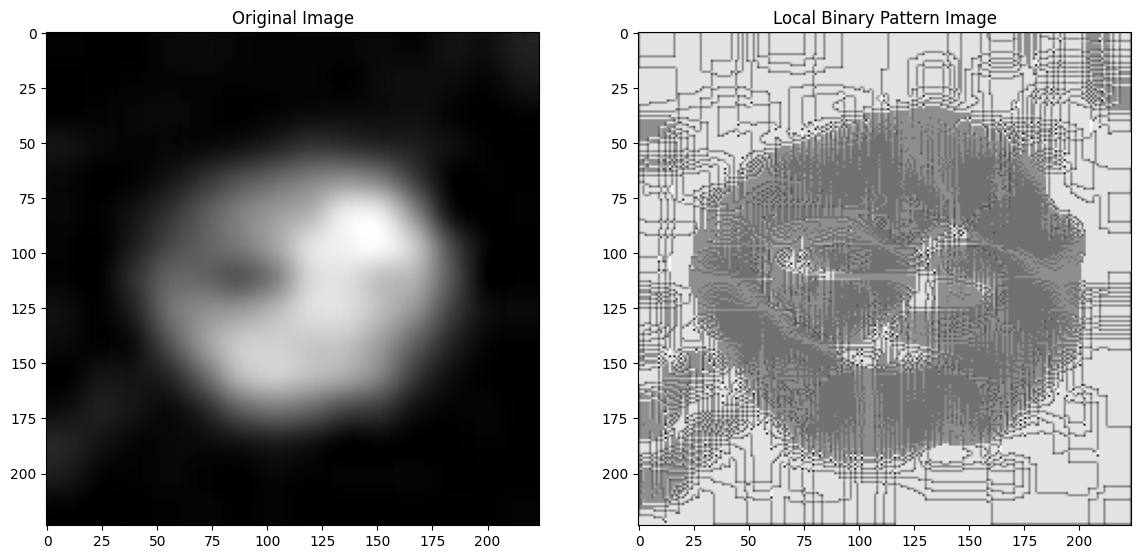

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.feature import local_binary_pattern

def sobel_operators(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)

    radius = 1
    n_points = 8 * radius

    lbp = local_binary_pattern(img_array, n_points, radius, method='uniform')
    lbp_normalized = (lbp / lbp.max()) * 255

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(lbp_normalized, cmap='gray')
    plt.title('Local Binary Pattern Image')

    plt.show()

    return img_array, lbp_normalized

image_path = f'{root_path}/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'
original_image, lbp_image = sobel_operators(image_path)

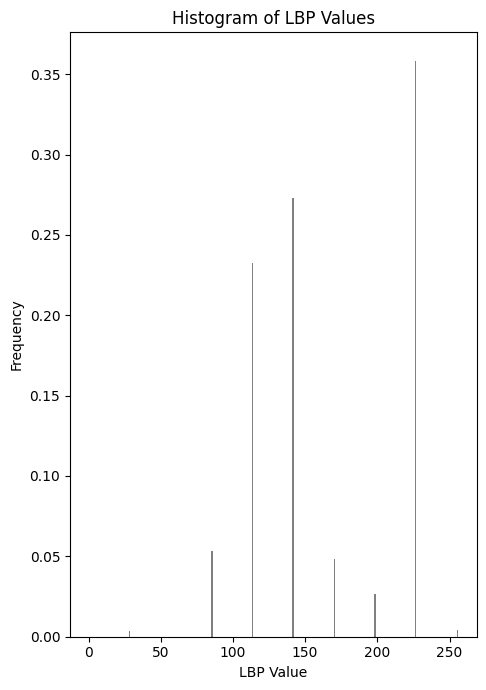

In [24]:
import matplotlib.pyplot as plt

def plot_lbp_and_histogram(original_image, lbp_image):
    plt.figure(figsize=(14, 7))
    n_bins = int(lbp_image.max() + 1)
    plt.subplot(1, 3, 3)
    plt.hist(lbp_image.ravel(), bins=n_bins, range=(0, n_bins), density=True, color="gray")
    plt.title("Histogram of LBP Values")
    plt.xlabel("LBP Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Plot the results
plot_lbp_and_histogram(original_image, lbp_image)

## MVM-LBP - Mean-Variance-Median Local Binary Pattern

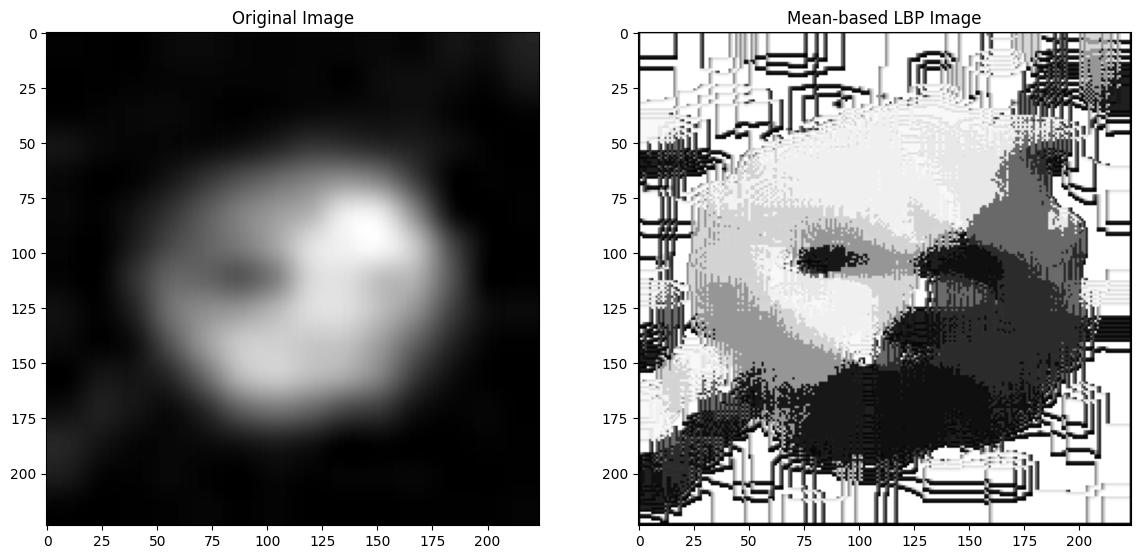

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def mean_based_lbp(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            mean_value = (np.sum(neighborhood) - center_pixel) / 8
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= mean_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()
    
    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255
    
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image_normalized, cmap='gray')
    plt.title('Mean-based LBP Image')
    plt.show()

mean_based_lbp(f'{root_path}/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg')

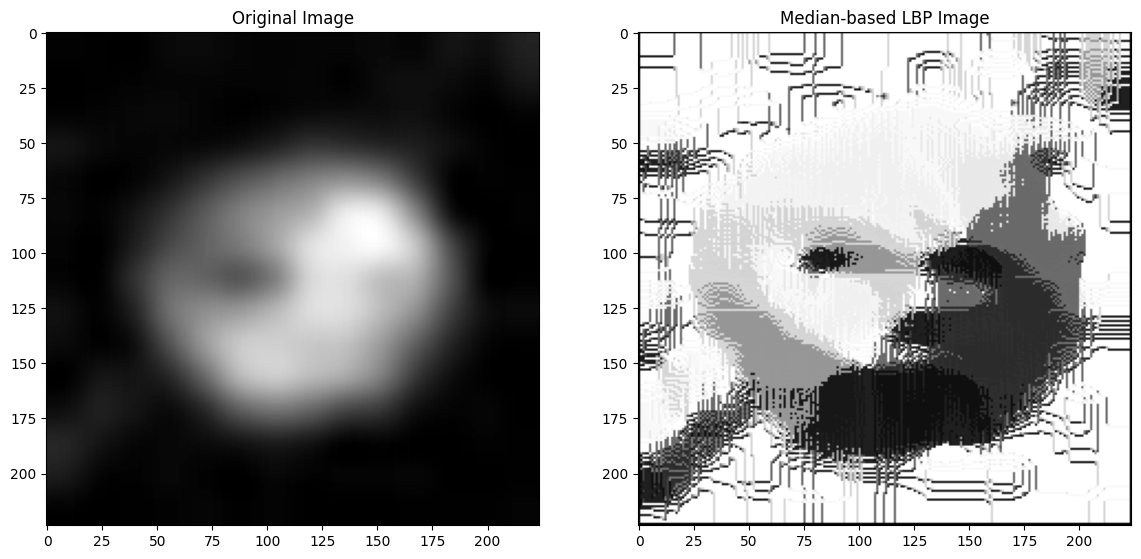

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def median_based_lbp(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            median_value = np.median(neighborhood.flatten())
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= median_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()
    
    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255
    
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image_normalized, cmap='gray')
    plt.title('Median-based LBP Image')
    plt.show()

median_based_lbp(f'{root_path}/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg')

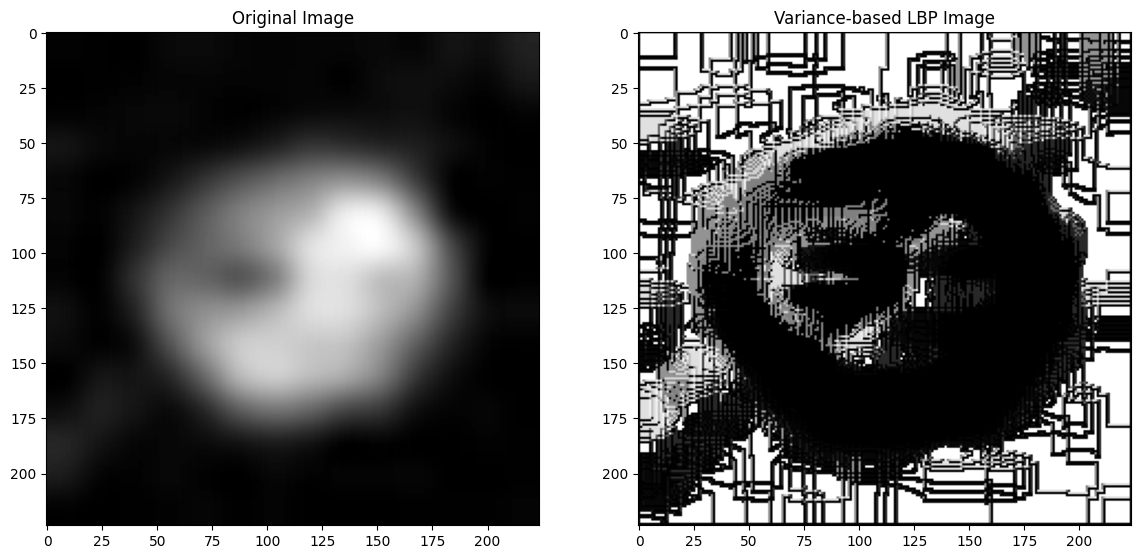

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def variance_based_lbp(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            variance_value = np.var(neighborhood.flatten())
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= center_pixel + variance_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()
    
    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image_normalized, cmap='gray')
    plt.title('Variance-based LBP Image')
    plt.show()

variance_based_lbp(f'{root_path}/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg')

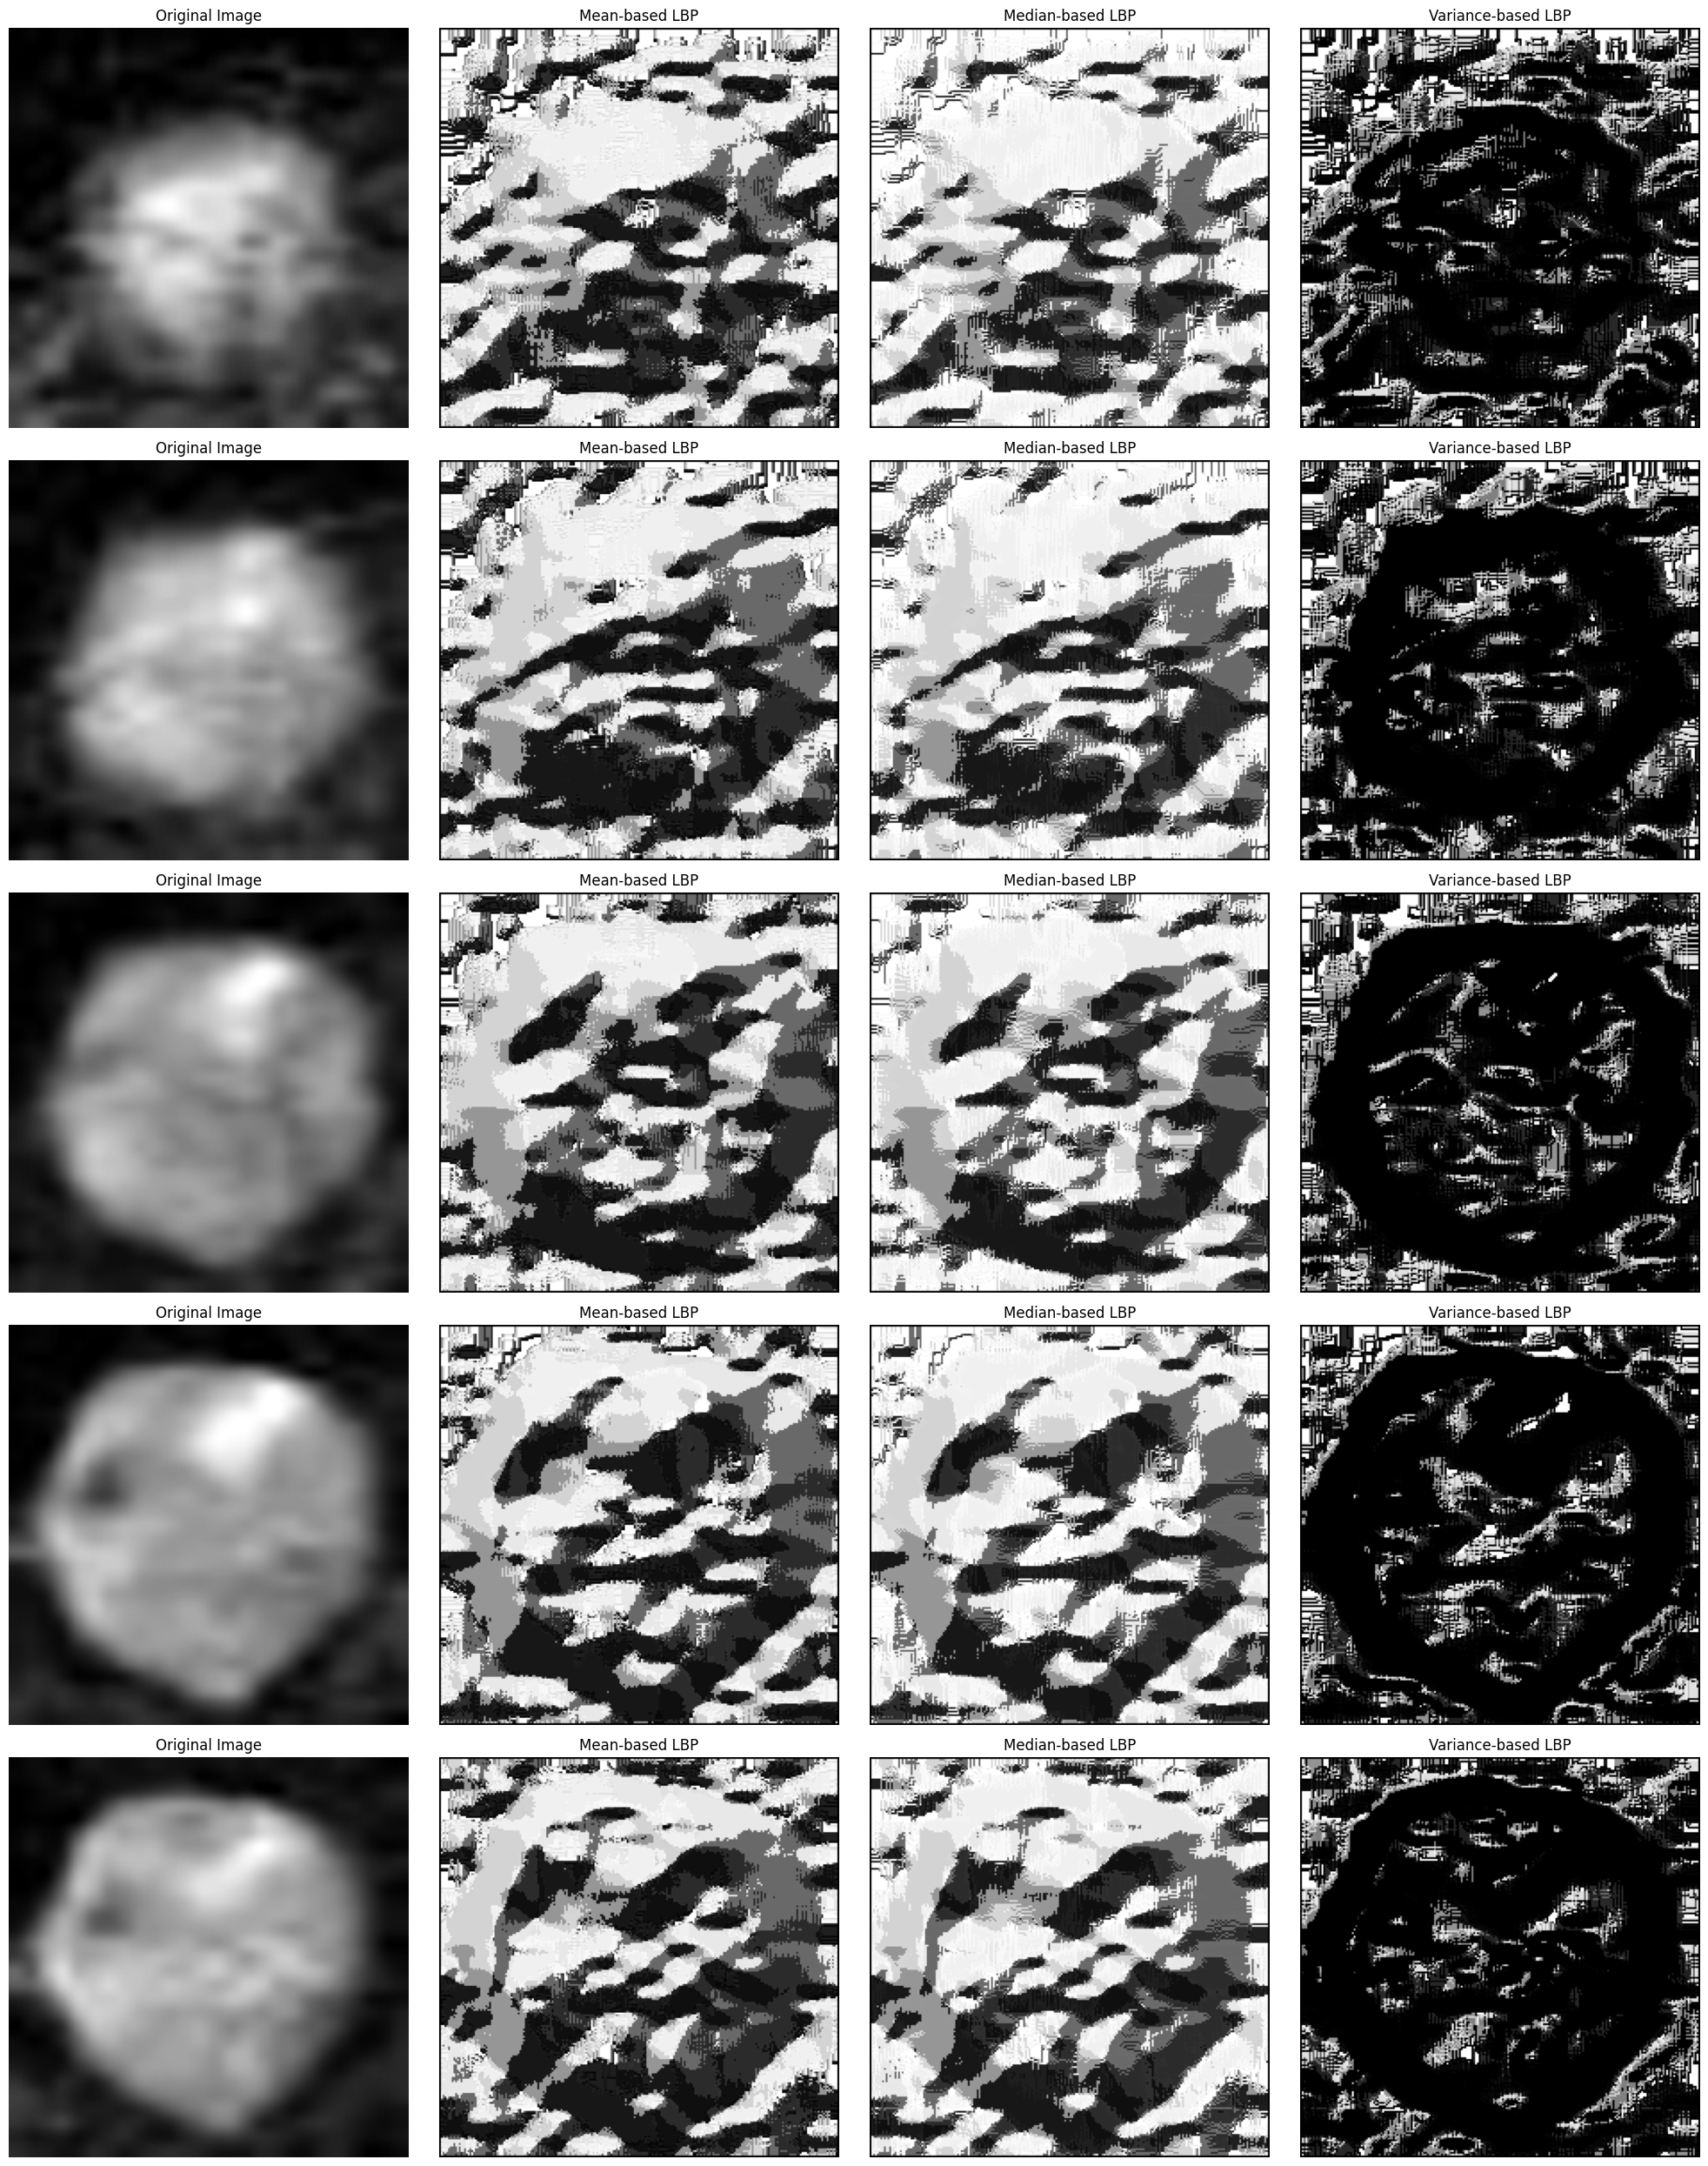

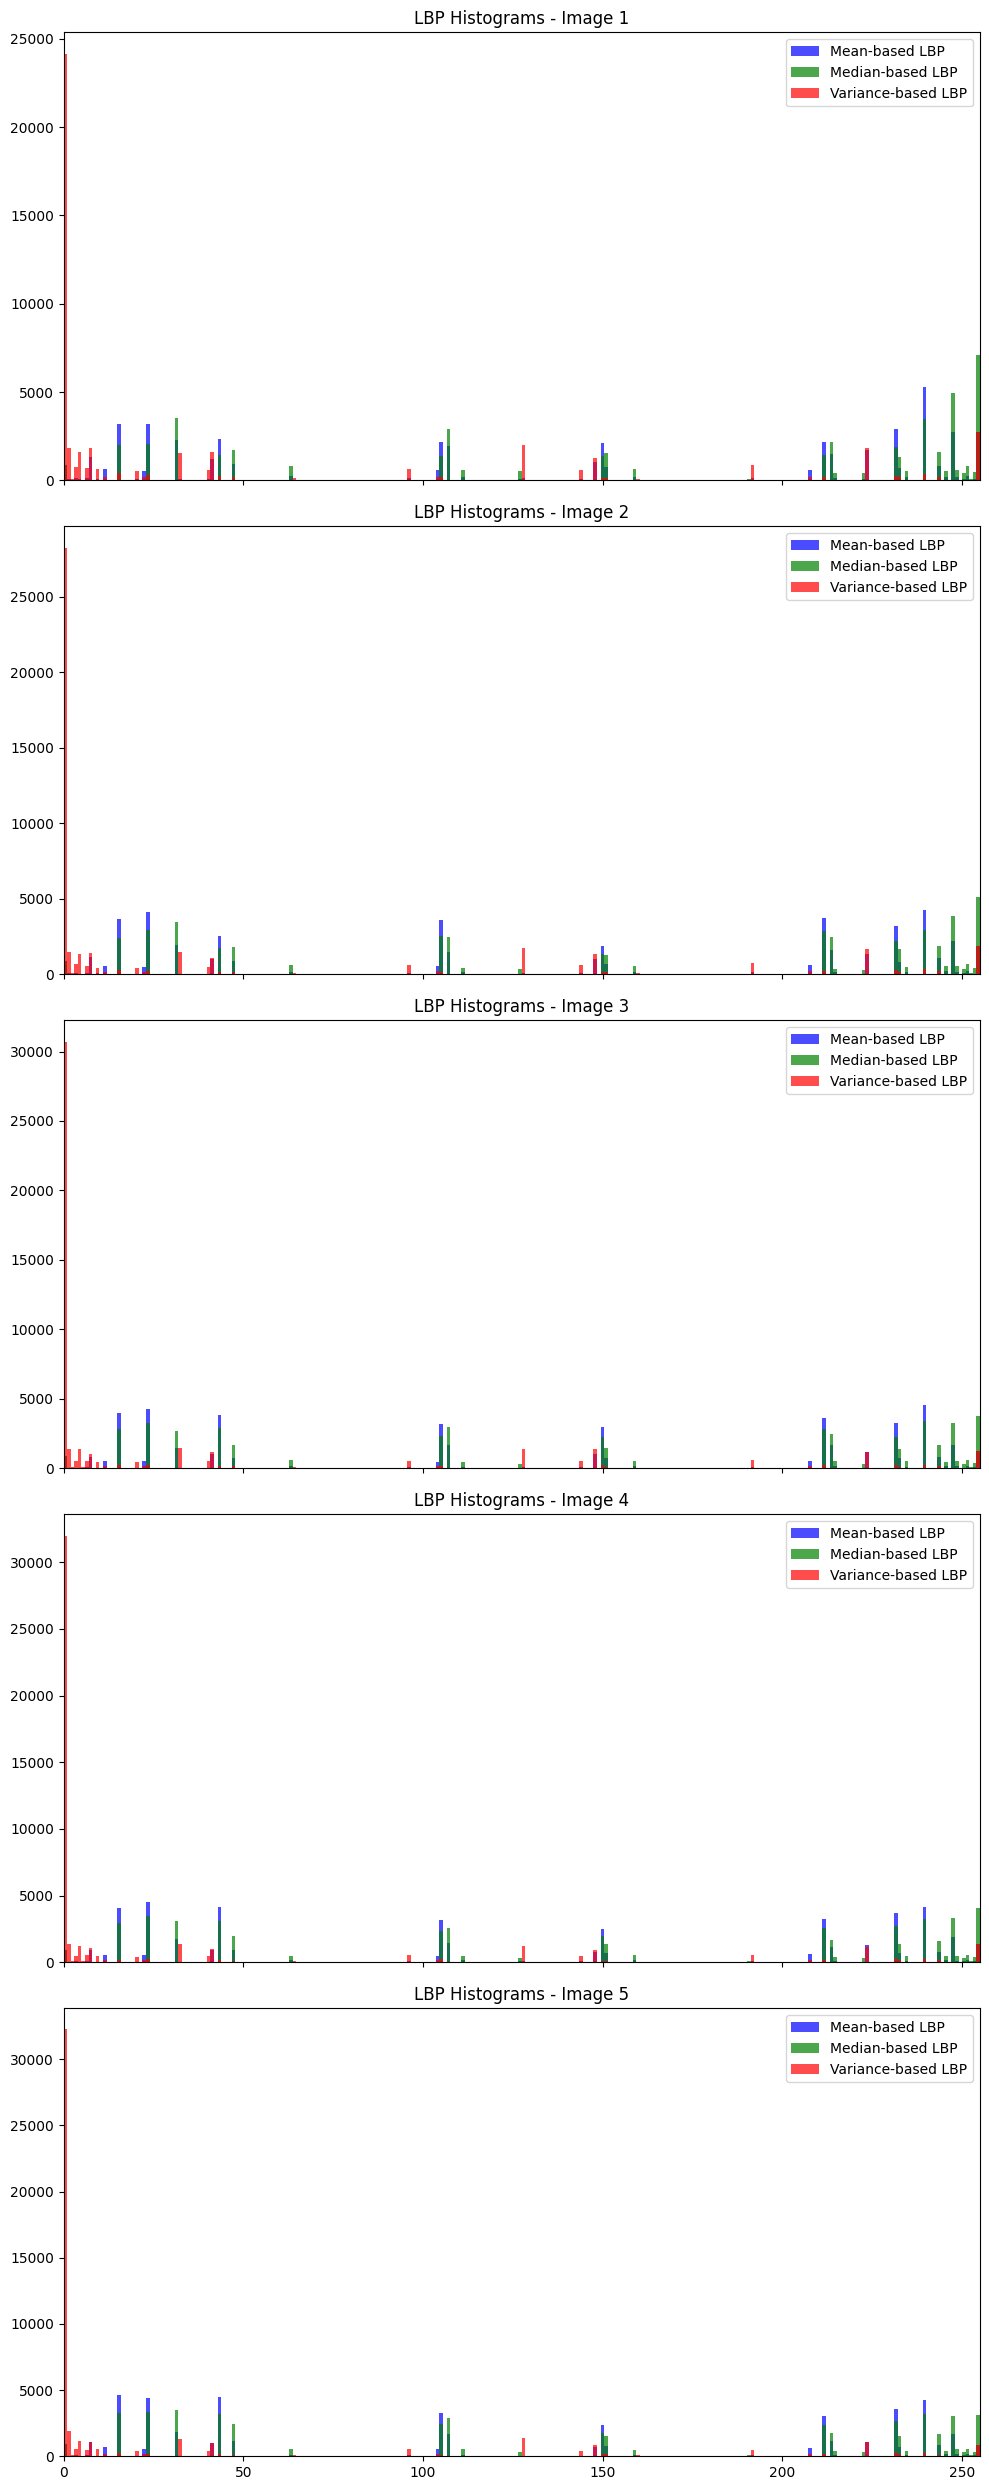

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def mean_based_lbp(img_array):
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            mean_value = (np.sum(neighborhood) - center_pixel) / 8
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= mean_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()
    
    return lbp_image

def median_based_lbp(img_array):
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            median_value = np.median(neighborhood)
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= median_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()
    
    return lbp_image

def variance_based_lbp(img_array):
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            center_pixel = img_array[i, j]
            variance_value = np.var(neighborhood)
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= center_pixel + variance_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()
    
    return lbp_image

def plot_images_and_histograms(images):
    num_images = len(images)
    fig, axes = plt.subplots(num_images, 4, figsize=(20, num_images * 5))

    for index, image_path in enumerate(images):
        image = Image.open(image_path).convert('L').resize((224, 224))
        img_array = np.array(image)

        mean_lbp = mean_based_lbp(img_array)
        median_lbp = median_based_lbp(img_array)
        variance_lbp = variance_based_lbp(img_array)

        mean_lbp_normalized = (mean_lbp / mean_lbp.max()) * 255
        median_lbp_normalized = (median_lbp / median_lbp.max()) * 255
        variance_lbp_normalized = (variance_lbp / variance_lbp.max()) * 255

        axes[index, 0].imshow(img_array, cmap='gray')
        axes[index, 0].set_title('Original Image')
        axes[index, 0].axis('off')

        axes[index, 1].imshow(mean_lbp_normalized, cmap='gray')
        axes[index, 1].set_title('Mean-based LBP')
        axes[index, 1].axis('off')

        axes[index, 2].imshow(median_lbp_normalized, cmap='gray')
        axes[index, 2].set_title('Median-based LBP')
        axes[index, 2].axis('off')

        axes[index, 3].imshow(variance_lbp_normalized, cmap='gray')
        axes[index, 3].set_title('Variance-based LBP')
        axes[index, 3].axis('off')

    plt.tight_layout()
    plt.show()

    # Plot histograms
    fig_hist, axes_hist = plt.subplots(num_images, 1, figsize=(10, num_images * 5), sharex=True)

    for index, image_path in enumerate(images):
        image = Image.open(image_path).convert('L').resize((224, 224))
        img_array = np.array(image)

        mean_lbp = mean_based_lbp(img_array)
        median_lbp = median_based_lbp(img_array)
        variance_lbp = variance_based_lbp(img_array)

        # Plotting histograms side by side
        axes_hist[index].hist(mean_lbp.ravel(), bins=256, color='blue', alpha=0.7, label='Mean-based LBP')
        axes_hist[index].hist(median_lbp.ravel(), bins=256, color='green', alpha=0.7, label='Median-based LBP')
        axes_hist[index].hist(variance_lbp.ravel(), bins=256, color='red', alpha=0.7, label='Variance-based LBP')
        axes_hist[index].set_title(f'LBP Histograms - Image {index + 1}')
        axes_hist[index].set_xlim([0, 255])
        axes_hist[index].legend()

    plt.tight_layout()
    plt.show()

image_paths = [
    f'{root_path}/test/Benign/BreaDM-Be-1906/SUB1/p-010.jpg',
    f'{root_path}/test/Benign/BreaDM-Be-1906/SUB1/p-011.jpg',
    f'{root_path}/test/Benign/BreaDM-Be-1906/SUB1/p-012.jpg',
    f'{root_path}/test/Benign/BreaDM-Be-1906/SUB1/p-013.jpg',
    f'{root_path}/test/Benign/BreaDM-Be-1906/SUB1/p-014.jpg'
]

plot_images_and_histograms(image_paths)


Mvmbp based lbp

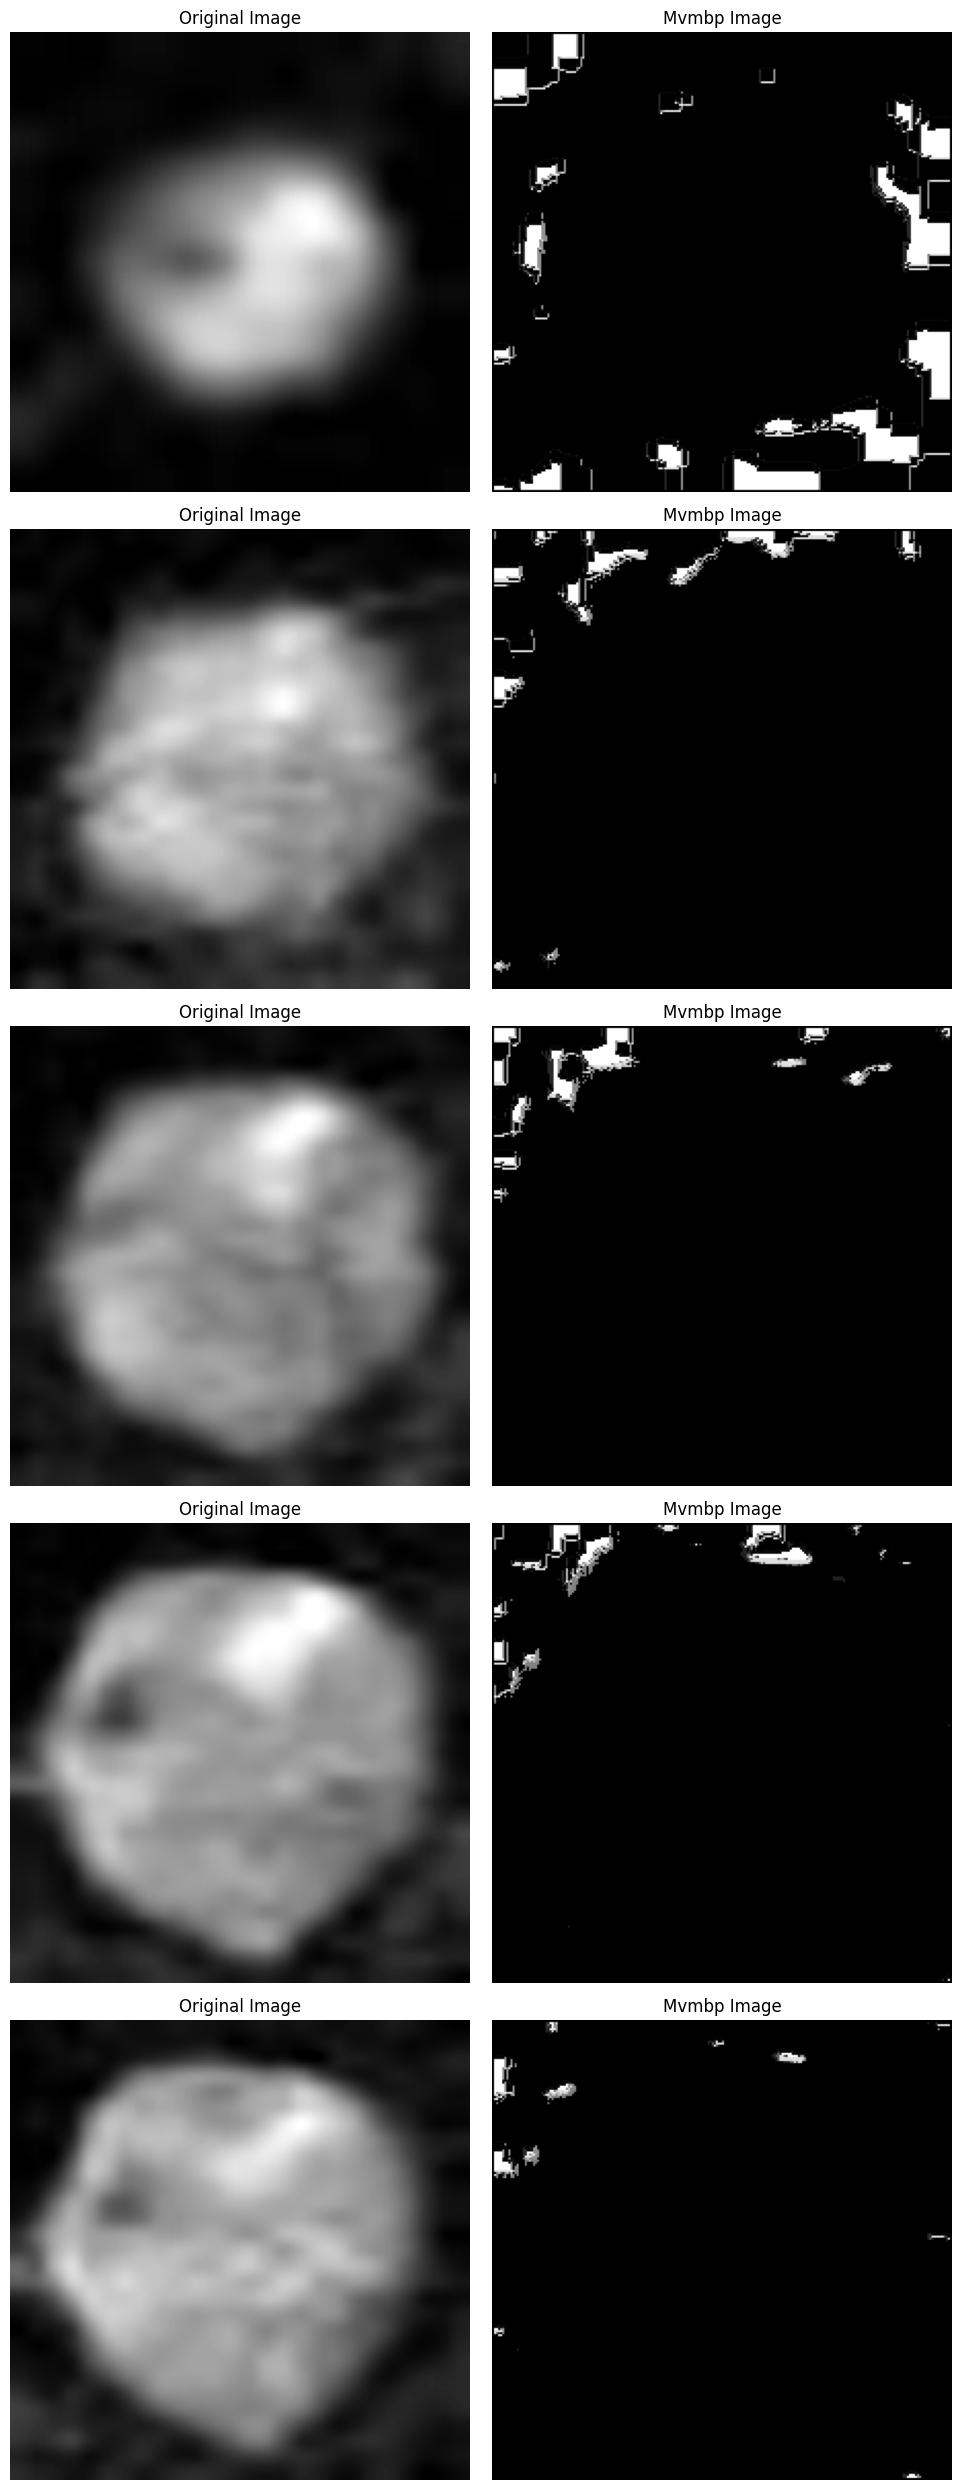

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def threshold_based_lbp(img_array):
    height, width = img_array.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = img_array[i, j]
            neighborhood = img_array[i-1:i+2, j-1:j+2]

            mean = np.mean(neighborhood)
            variance = np.var(neighborhood)
            median = np.median(neighborhood)
            threshold = (mean + np.sqrt(variance) + median) / 3

            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= center_pixel + threshold).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()

    return lbp_image

def plot_images(images):
    num_images = len(images)
    fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 5))

    if num_images == 1:
        axes = np.array([axes])

    for index, image_path in enumerate(images):
        image = Image.open(image_path).convert('L').resize((224, 224))
        img_array = np.array(image)

        threshold_lbp = threshold_based_lbp(img_array)

        threshold_lbp_normalized = (threshold_lbp / threshold_lbp.max()) * 255

        axes[index, 0].imshow(img_array, cmap='gray')
        axes[index, 0].set_title('Original Image')
        axes[index, 0].axis('off')

        axes[index, 1].imshow(threshold_lbp_normalized, cmap='gray')
        axes[index, 1].set_title('Mvmbp Image')
        axes[index, 1].axis('off')

    plt.tight_layout()
    plt.show()

image_paths = [
    f'{root_path}/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg',
    f'{root_path}/test/Benign/BreaDM-Be-1906/SUB1/p-011.jpg',
    f'{root_path}/test/Benign/BreaDM-Be-1906/SUB1/p-012.jpg',
    f'{root_path}/test/Benign/BreaDM-Be-1906/SUB1/p-013.jpg',
    f'{root_path}/test/Benign/BreaDM-Be-1906/SUB1/p-014.jpg'
]

plot_images(image_paths)


## Horizontal GLCM ( gray scale coccurrence matrix)

In [30]:
import numpy as np

def horizontal_GLCM(input_matrix):

    num_gray_levels = input_matrix.max() + 1
    
    glcm = np.zeros((num_gray_levels, num_gray_levels), dtype=int)
    
    for i in range(input_matrix.shape[0]):
        for j in range(input_matrix.shape[1] - 1):
            row_value = input_matrix[i, j]
            col_value = input_matrix[i, j + 1]
            glcm[row_value, col_value] += 1

    return glcm

input_matrix = np.array([
    [0, 1, 2, 3],
    [1, 0, 3, 2],
    [2, 3, 0, 1],
    [3, 2, 1, 0]
])

glcm_result = horizontal_GLCM(input_matrix)

print("Horizontal GLCM:")
print(glcm_result)


Horizontal GLCM:
[[0 2 0 1]
 [2 0 1 0]
 [0 1 0 2]
 [1 0 2 0]]


In [31]:
from PIL import Image
import numpy as np

def horizontal_GLCM(image_path, size=(224, 224)):
    
    img = Image.open(image_path).convert("L").resize(size)
    
    input_matrix = np.array(img, dtype=np.uint8)
    
    unique_gray_levels = np.unique(input_matrix)
    
    num_gray_levels = len(unique_gray_levels)
    
    glcm = np.zeros((num_gray_levels, num_gray_levels), dtype=int)

    
    gray_level_to_index = {level: index for index, level in enumerate(unique_gray_levels)}
    
    for i in range(input_matrix.shape[0]):
        for j in range(input_matrix.shape[1] - 1):
            row_value = input_matrix[i, j]
            col_value = input_matrix[i, j + 1]
            if row_value in gray_level_to_index and col_value in gray_level_to_index:
                row_index = gray_level_to_index[row_value]
                col_index = gray_level_to_index[col_value]
                glcm[row_index, col_index] += 1

    return glcm

image_paths = [
    f"{root_path}/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg",
    f"{root_path}/test/Benign/BreaDM-Be-1906/SUB1/p-011.jpg",
    f"{root_path}/train/Benign/BreaDM-Be-1818/VIBRANT/p-027.jpg",
    f"{root_path}/train/Benign/BreaDM-Be-1805/SUB6/p-033.jpg",
    f"{root_path}/test/Benign/BreaDM-Be-1906/SUB1/p-014.jpg"
]

for image_path in image_paths:
    glcm_result = horizontal_GLCM(image_path)
    print(f"Horizontal GLCM for {image_path}:")
    print(glcm_result)
    print("\n") 


Horizontal GLCM for /kaggle/input/classification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg:
[[3802  244    0 ...    0    0    0]
 [ 281 4047  287 ...    0    0    0]
 [   4  347 2846 ...    0    0    0]
 ...
 [   0    0    0 ...   14    7    0]
 [   0    0    0 ...    8   21    3]
 [   0    0    0 ...    0    3    3]]


Horizontal GLCM for /kaggle/input/classification-roi/test/Benign/BreaDM-Be-1906/SUB1/p-011.jpg:
[[913 119   3 ...   0   0   0]
 [ 98 669 159 ...   0   0   0]
 [  3 124 659 ...   0   0   0]
 ...
 [  0   0   0 ...   1   4   0]
 [  0   0   0 ...   3   5   2]
 [  0   0   0 ...   1   1   1]]


Horizontal GLCM for /kaggle/input/classification-roi/train/Benign/BreaDM-Be-1818/VIBRANT/p-027.jpg:
[[ 7  4  0 ...  0  0  0]
 [ 3  8 13 ...  0  0  0]
 [ 1  5  8 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  1  3]
 [ 0  0  0 ...  6 15  0]
 [ 0  0  0 ...  0  3  3]]


Horizontal GLCM for /kaggle/input/classification-roi/train/Benign/BreaDM-Be-1805/SUB6/p-033.jpg:
[[334  65  15 ...   0   0   0

In [18]:
import torch
import torchvision.models as models
vgg16 = models.vgg16(pretrained=True)
vgg16.eval()
print(vgg16)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:09<00:00, 57.1MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [19]:
import torch
import torch.nn as nn
import torchvision.models as models

class Custom(nn.Module):
    def __init__(self, num_classes=2):
        super(Custom ,self).__init__()
        vgg16 = models.vgg16(pretrained=True)
        self.features = vgg16.features
        self.avgpool = vgg16.avgpool
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

model = Custom(num_classes=2)
print(model)

Custom(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilatio

In [15]:
import numpy as np
import torch

class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path 
        self.trace_func = trace_func
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.inf

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'Early stopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model.')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


In [16]:
import torch
import torch.nn.functional as F
from tqdm import tqdm
import torch.optim as optim
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
import os


## Training Function 

In [40]:
import torch
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Training Function

def train(epoch, model, num_epochs, loader, criterion, l2_decay, lr):
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    model.train()
    correct = 0

    # Training loop
    for data, label in tqdm(loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch'):
        data, label = data.to(device), label.to(device)
  
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(loader.dataset)
    print(f'Train Accuracy: {accuracy:.2f}%')


## Testing Function

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(all_labels, all_predictions, labels):
    cm = confusion_matrix(all_labels, all_predictions)
    print("\nConfusion Matrix:\n", cm)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(all_labels, possibilities):
    fpr, tpr, thresholds = roc_curve(all_labels, possibilities[:, 1], drop_intermediate=True)
    auc_value = roc_auc_score(all_labels, possibilities[:, 1])

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkblue", lw=2, label=f"ROC Curve (AUC = {auc_value:.4f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2)
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return auc_value


In [66]:
import torch
import torch.nn.functional as F
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_confusion_matrix(true_labels, predicted_labels, labels=['benign', 'malignant']):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_roc_curve(all_labels, possibilities):
    fpr, tpr, thresholds = roc_curve(all_labels, possibilities[:, 1], drop_intermediate=True)
    auc_value = roc_auc_score(all_labels, possibilities[:, 1])

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkblue", lw=2, label=f"ROC Curve (AUC = {auc_value:.4f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2)
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return auc_value

def test(model, test_dataloader, criterion, labels=['benign', 'malignant']):
    model.eval()
    test_loss = 0
    correct = 0
    possibilities = None
    all_predictions = []
    all_labels = []

    for data, target in test_dataloader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()

        test_output = model(data)
        test_loss += F.cross_entropy(test_output, target, reduction='sum').item()

        pred = test_output.data.max(1)[1]
        all_predictions.extend(pred.cpu().numpy())
        all_labels.extend(target.cpu().numpy())

        possibility = F.softmax(test_output, dim=1).cpu().data.numpy()
        possibilities = np.concatenate((possibilities, possibility), axis=0) if possibilities is not None else possibility

        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    # Flatten predictions and labels
    all_predictions = [i for i in all_predictions]
    all_labels = [i for i in all_labels]

    # Classification metrics
    print(metrics.classification_report(all_labels, all_predictions, target_names=labels, digits=4))

    # Plot Confusion Matrix
    plot_confusion_matrix(all_labels, all_predictions, labels)

    # Plot ROC Curve and AUC
    auc_value = plot_roc_curve(all_labels, possibilities)

    # Calculate specificity and sensitivity
    fpr, tpr, _ = roc_curve(all_labels, possibilities[:, 1])
    specificity = 1 - fpr[1] if len(fpr) > 1 else 0.0
    sensitivity = tpr[1] if len(tpr) > 1 else 0.0

    # Average loss
    test_loss /= len(test_dataloader.dataset)

    # Print metrics
    print(f'Specificity: {specificity:.4f}, Sensitivity: {sensitivity:.4f}, AUC: {auc_value:.4f}')
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_dataloader.dataset)} ({100. * correct / len(test_dataloader.dataset):.2f}%)\n')

    return 100. * correct / len(test_dataloader.dataset), test_loss, auc_value


## Validation Function

In [24]:
def validation(model, val_dataloader):
    model.eval()
    correct = 0
    all_predictions = []
    all_targets = []
    possibilities = None
    
    with torch.no_grad():
        for data, target in val_dataloader:
            data, target = data.to(device), target.to(device)
            val_output = model(data)
            test_loss = F.nll_loss(F.log_softmax(val_output, dim=1), target, reduction='sum').item()
            pred = val_output.argmax(dim=1, keepdim=True)
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(val_output, dim=1).cpu().data.numpy()
            if possibilities is None:
                possibilities = prob
            else:
                possibilities = np.concatenate((possibilities, prob), axis=0)
            correct += pred.eq(target.view_as(pred)).cpu().sum().item()

    all_predictions = np.array(all_predictions).flatten()
    all_targets = np.array(all_targets).flatten()
    cm = confusion_matrix(all_targets, all_predictions)
    print(f'Confusion Matrix:\n{cm}')
    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[all_targets.astype(int)]

    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())

    auc_value = auc(fpr, tpr)
    specificity = 1 - fpr[1]
    sensitivity = tpr[1]
    print(f'Specificity: {specificity:.4f}, Sensitivity: {sensitivity:.4f}, AUC: {auc_value:.4f}')

    test_loss /= len(val_dataloader.dataset)
    accuracy = 100. * correct / len(val_dataloader.dataset)
    print(f'Validation Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

    return accuracy, test_loss, auc_value


## VGG16 MODEL 

In [25]:
import os
import torch
import torch.nn as nn
import shutil

# Hyperparameters
best_accuracy = 0
early_stop = EarlyStopping(patience=20, verbose=True)
project_name = "tumor_classification"
model_name = "vgg16"
num_epochs = 50
criterion = nn.CrossEntropyLoss()
l2_decay = 5e-4
lr = 0.001

# Training loop
for epoch in range(1, num_epochs + 1):
    train(epoch, model, num_epochs, trainloader, criterion, l2_decay, lr)

    with torch.no_grad():
        accuracy, val_loss, auc_value = validation(model, valloader)

    model_save_dir = os.path.join('model', project_name, model_name)
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)

    best_model_path = os.path.join(model_save_dir, f'{model_name}_best.pth')
    if auc_value > best_accuracy:
        best_accuracy = auc_value
        torch.save(model.state_dict(), best_model_path)
        print(f"Model saved with AUC: {auc_value:.4f}")

    early_stop(val_loss, model)
    if early_stop.early_stop:
        print("Early stopping")
        break

# Load the best model
best_model_path = os.path.join(model_save_dir, f'{model_name}_best.pth')
if os.path.exists(best_model_path):
    model.load_state_dict(torch.load(best_model_path))
    print("Best model loaded successfully.")

    download_path = f'/kaggle/working/{model_name}_best.pth'  
    shutil.copy(best_model_path, download_path)  
    print(f"Model saved and ready to download at: {download_path}")
else:
    print("No saved model found.")


Epoch 2/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 73.45%


Confusion Matrix:
[[  90  318]
 [  63 1518]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8914
Validation Loss: 0.0011, Accuracy: 80.84%
Model saved with AUC: 0.8914
Validation loss decreased (inf --> 0.001111). Saving model.


Epoch 3/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 74.96%


Confusion Matrix:
[[  52  356]
 [  59 1522]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8850
Validation Loss: 0.0010, Accuracy: 79.14%
Validation loss decreased (0.001111 --> 0.001033). Saving model.


Epoch 4/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 75.44%


Confusion Matrix:
[[  90  318]
 [  22 1559]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9314
Validation Loss: 0.0006, Accuracy: 82.91%
Model saved with AUC: 0.9314
Validation loss decreased (0.001033 --> 0.000558). Saving model.


Epoch 5/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 76.11%


Confusion Matrix:
[[ 158  250]
 [ 112 1469]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9036
Validation Loss: 0.0008, Accuracy: 81.80%
Early stopping counter: 1 out of 20


Epoch 6/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 76.39%


Confusion Matrix:
[[ 110  298]
 [  25 1556]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9307
Validation Loss: 0.0005, Accuracy: 83.76%
Validation loss decreased (0.000558 --> 0.000533). Saving model.


Epoch 7/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 76.68%


Confusion Matrix:
[[ 218  190]
 [ 147 1434]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9241
Validation Loss: 0.0009, Accuracy: 83.06%
Early stopping counter: 1 out of 20


Epoch 8/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 77.33%


Confusion Matrix:
[[ 149  259]
 [ 166 1415]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8904
Validation Loss: 0.0015, Accuracy: 78.63%
Early stopping counter: 2 out of 20


Epoch 9/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 77.07%


Confusion Matrix:
[[ 200  208]
 [ 407 1174]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8022
Validation Loss: 0.0012, Accuracy: 69.08%
Early stopping counter: 3 out of 20


Epoch 10/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 77.46%


Confusion Matrix:
[[ 191  217]
 [ 125 1456]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9229
Validation Loss: 0.0008, Accuracy: 82.81%
Early stopping counter: 4 out of 20


Epoch 11/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 78.58%


Confusion Matrix:
[[ 195  213]
 [ 239 1342]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8693
Validation Loss: 0.0006, Accuracy: 77.28%
Early stopping counter: 5 out of 20


Epoch 12/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 79.15%


Confusion Matrix:
[[ 217  191]
 [ 293 1288]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8602
Validation Loss: 0.0007, Accuracy: 75.67%
Early stopping counter: 6 out of 20


Epoch 13/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 79.06%


Confusion Matrix:
[[ 207  201]
 [ 308 1273]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8450
Validation Loss: 0.0016, Accuracy: 74.41%
Early stopping counter: 7 out of 20


Epoch 14/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 79.51%


Confusion Matrix:
[[ 201  207]
 [ 272 1309]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8596
Validation Loss: 0.0011, Accuracy: 75.92%
Early stopping counter: 8 out of 20


Epoch 15/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 79.21%


Confusion Matrix:
[[ 203  205]
 [ 308 1273]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8432
Validation Loss: 0.0010, Accuracy: 74.21%
Early stopping counter: 9 out of 20


Epoch 16/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 79.16%


Confusion Matrix:
[[ 218  190]
 [ 287 1294]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8657
Validation Loss: 0.0019, Accuracy: 76.02%
Early stopping counter: 10 out of 20


Epoch 17/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 79.41%


Confusion Matrix:
[[ 188  220]
 [ 151 1430]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9049
Validation Loss: 0.0009, Accuracy: 81.35%
Early stopping counter: 11 out of 20


Epoch 18/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 79.52%


Confusion Matrix:
[[ 193  215]
 [ 165 1416]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9003
Validation Loss: 0.0004, Accuracy: 80.89%
Validation loss decreased (0.000533 --> 0.000388). Saving model.


Epoch 19/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 79.63%


Confusion Matrix:
[[ 199  209]
 [ 203 1378]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8831
Validation Loss: 0.0006, Accuracy: 79.29%
Early stopping counter: 1 out of 20


Epoch 20/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 79.84%


Confusion Matrix:
[[ 209  199]
 [ 185 1396]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9055
Validation Loss: 0.0003, Accuracy: 80.69%
Validation loss decreased (0.000388 --> 0.000311). Saving model.


Epoch 21/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 79.91%


Confusion Matrix:
[[ 211  197]
 [ 254 1327]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8744
Validation Loss: 0.0014, Accuracy: 77.33%
Early stopping counter: 1 out of 20


Epoch 22/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 80.14%


Confusion Matrix:
[[ 201  207]
 [ 263 1318]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8656
Validation Loss: 0.0017, Accuracy: 76.37%
Early stopping counter: 2 out of 20


Epoch 23/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 79.95%


Confusion Matrix:
[[ 207  201]
 [ 278 1303]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8606
Validation Loss: 0.0018, Accuracy: 75.92%
Early stopping counter: 3 out of 20


Epoch 24/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 80.04%


Confusion Matrix:
[[ 212  196]
 [ 301 1280]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8490
Validation Loss: 0.0010, Accuracy: 75.01%
Early stopping counter: 4 out of 20


Epoch 25/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 80.03%


Confusion Matrix:
[[ 207  201]
 [ 252 1329]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8711
Validation Loss: 0.0010, Accuracy: 77.22%
Early stopping counter: 5 out of 20


Epoch 26/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 79.88%


Confusion Matrix:
[[ 212  196]
 [ 310 1271]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8464
Validation Loss: 0.0021, Accuracy: 74.56%
Early stopping counter: 6 out of 20


Epoch 27/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 80.11%


Confusion Matrix:
[[ 200  208]
 [ 273 1308]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8614
Validation Loss: 0.0015, Accuracy: 75.82%
Early stopping counter: 7 out of 20


Epoch 28/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 79.90%


Confusion Matrix:
[[ 205  203]
 [ 294 1287]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8545
Validation Loss: 0.0013, Accuracy: 75.01%
Early stopping counter: 8 out of 20


Epoch 29/50: 100%|██████████| 639/639 [02:42<00:00,  3.94batch/s]

Train Accuracy: 80.13%


Confusion Matrix:
[[ 199  209]
 [ 286 1295]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8565
Validation Loss: 0.0010, Accuracy: 75.11%
Early stopping counter: 9 out of 20


Epoch 30/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 79.99%


Confusion Matrix:
[[ 198  210]
 [ 249 1332]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8699
Validation Loss: 0.0020, Accuracy: 76.92%
Early stopping counter: 10 out of 20


Epoch 31/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 79.95%


Confusion Matrix:
[[ 203  205]
 [ 274 1307]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8622
Validation Loss: 0.0018, Accuracy: 75.92%
Early stopping counter: 11 out of 20


Epoch 32/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 79.98%


Confusion Matrix:
[[ 198  210]
 [ 287 1294]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8549
Validation Loss: 0.0012, Accuracy: 75.01%
Early stopping counter: 12 out of 20


Epoch 33/50: 100%|██████████| 639/639 [02:42<00:00,  3.93batch/s]

Train Accuracy: 80.23%


Confusion Matrix:
[[ 202  206]
 [ 281 1300]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8575
Validation Loss: 0.0014, Accuracy: 75.52%
Early stopping counter: 13 out of 20


Epoch 34/50: 100%|██████████| 639/639 [02:42<00:00,  3.92batch/s]

Train Accuracy: 80.18%


Confusion Matrix:
[[ 200  208]
 [ 294 1287]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8477
Validation Loss: 0.0024, Accuracy: 74.76%
Early stopping counter: 14 out of 20


Epoch 35/50: 100%|██████████| 639/639 [02:43<00:00,  3.92batch/s]

Train Accuracy: 80.25%


Confusion Matrix:
[[ 200  208]
 [ 281 1300]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8562
Validation Loss: 0.0018, Accuracy: 75.41%
Early stopping counter: 15 out of 20


Epoch 36/50: 100%|██████████| 639/639 [02:43<00:00,  3.91batch/s]

Train Accuracy: 79.95%


Confusion Matrix:
[[ 212  196]
 [ 294 1287]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8564
Validation Loss: 0.0012, Accuracy: 75.36%
Early stopping counter: 16 out of 20


Epoch 37/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 80.56%


Confusion Matrix:
[[ 212  196]
 [ 248 1333]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8770
Validation Loss: 0.0005, Accuracy: 77.68%
Early stopping counter: 17 out of 20


Epoch 38/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 79.94%


Confusion Matrix:
[[ 207  201]
 [ 262 1319]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8693
Validation Loss: 0.0008, Accuracy: 76.72%
Early stopping counter: 18 out of 20


Epoch 39/50: 100%|██████████| 639/639 [02:43<00:00,  3.92batch/s]

Train Accuracy: 80.01%


Confusion Matrix:
[[ 203  205]
 [ 270 1311]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8653
Validation Loss: 0.0014, Accuracy: 76.12%
Early stopping counter: 19 out of 20


Epoch 40/50: 100%|██████████| 639/639 [02:43<00:00,  3.91batch/s]

Train Accuracy: 80.07%


Confusion Matrix:
[[ 202  206]
 [ 295 1286]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8490
Validation Loss: 0.0010, Accuracy: 74.81%
Early stopping counter: 20 out of 20
Early stopping


/tmp/ipykernel_30/2510177977.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Best model loaded successfully.
Model saved and ready to download at: /kaggle/working/vgg16_best.pth


In [26]:
from IPython.display import FileLink

model_path = '/kaggle/working/vgg16_best.pth'
if os.path.exists(model_path):
    print(f"Download link for the model: {model_path}")
    display(FileLink(model_path))
else:
    print("Model file not found.")


Download link for the model: /kaggle/working/vgg16_best.pth


/kaggle/working/vgg16_best.pth

              precision    recall  f1-score   support

      benign     0.6946    0.4401    0.5389      1938
   malignant     0.8070    0.9237    0.8614      4913

    accuracy                         0.7869      6851
   macro avg     0.7508    0.6819    0.7001      6851
weighted avg     0.7752    0.7869    0.7702      6851


Confusion Matrix:
 [[ 853 1085]
 [ 375 4538]]


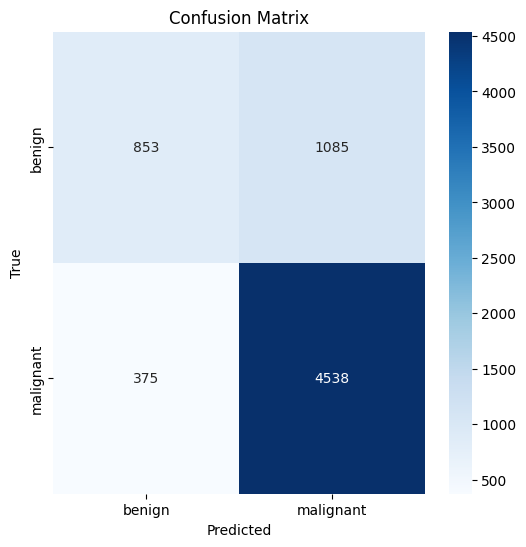

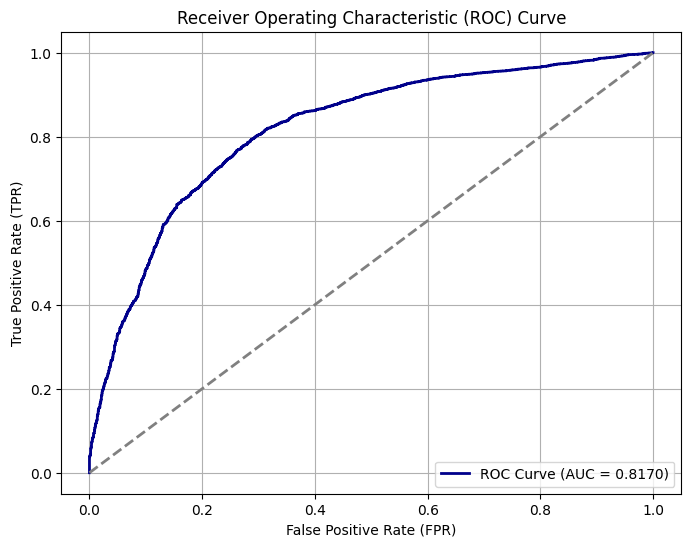

Specificity: 1.0000, Sensitivity: 0.0002, AUC: 0.8170

Test set: Average loss: 0.4677, Accuracy: 5391/6851 (78.69%)

Test set results - Accuracy: 78.69%, Loss: 0.4677, AUC: 0.8170


In [28]:
from sklearn import metrics  

test_accuracy, test_loss, test_auc = test(model, testloader)

print(f"Test set results - Accuracy: {test_accuracy:.2f}%, Loss: {test_loss:.4f}, AUC: {test_auc:.4f}")


## Resnet18

In [42]:
import os
import torch
import torch.nn as nn

# custom Resnet18 class
class Resnet18(nn.Module):
    def __init__(self, num_classes=2):
        super(Resnet18, self).__init__()
        model_resnet18 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

        self.conv1 = model_resnet18.conv1
        self.bn1 = model_resnet18.bn1
        self.relu = model_resnet18.relu
        self.maxpool = model_resnet18.maxpool
        self.layer1 = model_resnet18.layer1
        self.layer2 = model_resnet18.layer2
        self.layer3 = model_resnet18.layer3
        self.layer4 = model_resnet18.layer4
        self.avgpool = model_resnet18.avgpool
        self.__features = model_resnet18.fc.in_features
        
        self.fc = nn.Linear(self.__features, num_classes)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [44]:
import torch
import os
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Resnet18(num_classes=2).to(device)

# Hyperparameters
best_accuracy = 0
early_stop = EarlyStopping(patience=20, verbose=True)  
project_name = "tumor_classification"
model_name = "Resnet18"
num_epochs = 50
criterion = nn.CrossEntropyLoss()
l2_decay = 5e-4
lr = 0.001

# Training loop
for epoch in range(1, num_epochs + 1):
    train(epoch, model, num_epochs, trainloader, criterion, l2_decay, lr) 

    with torch.no_grad():
        accuracy, val_loss, auc_value = validation(model, valloader)  
  
    model_save_dir = os.path.join('model', project_name, model_name)
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)

    best_model_path = os.path.join(model_save_dir, f'{model_name}_best.pth')

    if auc_value > best_accuracy:
        best_accuracy = auc_value
        torch.save(model.state_dict(), best_model_path)
        print(f"Model saved with AUC: {auc_value:.4f}")

    early_stop(val_loss, model)
    if early_stop.early_stop:
        print("Early stopping")
        break

if os.path.exists(best_model_path):

    model.load_state_dict(torch.load(best_model_path))
    print("Best model loaded successfully.")
    
    output_path = "./output"
    os.makedirs(output_path, exist_ok=True)
    download_model_path = os.path.join(output_path, f'{model_name}_best.pth')
    torch.save(model.state_dict(), download_model_path)
    print(f"Model saved for download: {download_model_path}")
else:
    print("No saved model found.")


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 2/50: 100%|██████████| 639/639 [00:55<00:00, 11.41batch/s]

Train Accuracy: 72.53%


Confusion Matrix:
[[ 300  108]
 [ 349 1232]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8487
Validation Loss: 0.0024, Accuracy: 77.02%
Model saved with AUC: 0.8487
Validation loss decreased (inf --> 0.002368). Saving model.


Epoch 3/50: 100%|██████████| 639/639 [00:55<00:00, 11.44batch/s]

Train Accuracy: 73.86%


Confusion Matrix:
[[ 281  127]
 [ 471 1110]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7784
Validation Loss: 0.0015, Accuracy: 69.93%
Validation loss decreased (0.002368 --> 0.001457). Saving model.


Epoch 4/50: 100%|██████████| 639/639 [00:55<00:00, 11.55batch/s]

Train Accuracy: 75.13%


Confusion Matrix:
[[ 258  150]
 [ 181 1400]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9133
Validation Loss: 0.0011, Accuracy: 83.36%
Model saved with AUC: 0.9133
Validation loss decreased (0.001457 --> 0.001072). Saving model.


Epoch 5/50: 100%|██████████| 639/639 [00:56<00:00, 11.39batch/s]

Train Accuracy: 76.02%


Confusion Matrix:
[[ 330   78]
 [ 552 1029]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7350
Validation Loss: 0.0018, Accuracy: 68.33%
Early stopping counter: 1 out of 20


Epoch 6/50: 100%|██████████| 639/639 [00:56<00:00, 11.37batch/s]

Train Accuracy: 76.23%


Confusion Matrix:
[[ 337   71]
 [ 527 1054]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7661
Validation Loss: 0.0020, Accuracy: 69.93%
Early stopping counter: 2 out of 20


Epoch 7/50: 100%|██████████| 639/639 [00:57<00:00, 11.06batch/s]

Train Accuracy: 76.57%


Confusion Matrix:
[[ 237  171]
 [ 189 1392]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.9044
Validation Loss: 0.0022, Accuracy: 81.90%
Early stopping counter: 3 out of 20


Epoch 8/50: 100%|██████████| 639/639 [00:56<00:00, 11.22batch/s]

Train Accuracy: 76.99%


Confusion Matrix:
[[ 214  194]
 [ 167 1414]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.8982
Validation Loss: 0.0011, Accuracy: 81.85%
Validation loss decreased (0.001072 --> 0.001065). Saving model.


Epoch 9/50: 100%|██████████| 639/639 [00:56<00:00, 11.33batch/s]

Train Accuracy: 77.33%


Confusion Matrix:
[[ 282  126]
 [ 538 1043]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7281
Validation Loss: 0.0011, Accuracy: 66.62%
Early stopping counter: 1 out of 20


Epoch 10/50: 100%|██████████| 639/639 [00:57<00:00, 11.07batch/s]

Train Accuracy: 77.17%


Confusion Matrix:
[[360  48]
 [723 858]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6794
Validation Loss: 0.0009, Accuracy: 61.24%
Validation loss decreased (0.001065 --> 0.000912). Saving model.


Epoch 11/50: 100%|██████████| 639/639 [00:57<00:00, 11.18batch/s]

Train Accuracy: 78.51%


Confusion Matrix:
[[339  69]
 [722 859]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6841
Validation Loss: 0.0014, Accuracy: 60.23%
Early stopping counter: 1 out of 20


Epoch 12/50: 100%|██████████| 639/639 [00:56<00:00, 11.35batch/s]

Train Accuracy: 78.92%


Confusion Matrix:
[[ 323   85]
 [ 560 1021]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7630
Validation Loss: 0.0012, Accuracy: 67.57%
Early stopping counter: 2 out of 20


Epoch 13/50: 100%|██████████| 639/639 [00:55<00:00, 11.45batch/s]

Train Accuracy: 79.05%


Confusion Matrix:
[[315  93]
 [609 972]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7281
Validation Loss: 0.0015, Accuracy: 64.71%
Early stopping counter: 3 out of 20


Epoch 14/50: 100%|██████████| 639/639 [00:56<00:00, 11.40batch/s]

Train Accuracy: 79.24%


Confusion Matrix:
[[291 117]
 [618 963]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7026
Validation Loss: 0.0033, Accuracy: 63.05%
Early stopping counter: 4 out of 20


Epoch 15/50: 100%|██████████| 639/639 [00:55<00:00, 11.54batch/s]

Train Accuracy: 79.24%


Confusion Matrix:
[[ 301  107]
 [ 540 1041]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7539
Validation Loss: 0.0027, Accuracy: 67.47%
Early stopping counter: 5 out of 20


Epoch 16/50: 100%|██████████| 639/639 [00:56<00:00, 11.40batch/s]

Train Accuracy: 79.62%


Confusion Matrix:
[[307 101]
 [752 829]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6303
Validation Loss: 0.0026, Accuracy: 57.11%
Early stopping counter: 6 out of 20


Epoch 17/50: 100%|██████████| 639/639 [00:55<00:00, 11.58batch/s]

Train Accuracy: 79.57%


Confusion Matrix:
[[ 307  101]
 [ 540 1041]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7601
Validation Loss: 0.0006, Accuracy: 67.77%
Validation loss decreased (0.000912 --> 0.000563). Saving model.


Epoch 18/50: 100%|██████████| 639/639 [00:55<00:00, 11.45batch/s]

Train Accuracy: 79.55%


Confusion Matrix:
[[312  96]
 [641 940]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7084
Validation Loss: 0.0014, Accuracy: 62.95%
Early stopping counter: 1 out of 20


Epoch 19/50: 100%|██████████| 639/639 [00:55<00:00, 11.48batch/s]

Train Accuracy: 79.65%


Confusion Matrix:
[[314  94]
 [655 926]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6856
Validation Loss: 0.0008, Accuracy: 62.34%
Early stopping counter: 2 out of 20


Epoch 20/50: 100%|██████████| 639/639 [00:55<00:00, 11.60batch/s]

Train Accuracy: 80.06%


Confusion Matrix:
[[304 104]
 [646 935]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6949
Validation Loss: 0.0023, Accuracy: 62.29%
Early stopping counter: 3 out of 20


Epoch 21/50: 100%|██████████| 639/639 [00:56<00:00, 11.39batch/s]

Train Accuracy: 79.87%


Confusion Matrix:
[[294 114]
 [595 986]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7284
Validation Loss: 0.0007, Accuracy: 64.35%
Early stopping counter: 4 out of 20


Epoch 22/50: 100%|██████████| 639/639 [00:55<00:00, 11.50batch/s]

Train Accuracy: 79.96%


Confusion Matrix:
[[ 285  123]
 [ 525 1056]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7608
Validation Loss: 0.0014, Accuracy: 67.42%
Early stopping counter: 5 out of 20


Epoch 23/50: 100%|██████████| 639/639 [00:55<00:00, 11.58batch/s]

Train Accuracy: 80.23%


Confusion Matrix:
[[304 104]
 [634 947]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7046
Validation Loss: 0.0006, Accuracy: 62.90%
Early stopping counter: 6 out of 20


Epoch 24/50: 100%|██████████| 639/639 [00:55<00:00, 11.48batch/s]

Train Accuracy: 79.95%


Confusion Matrix:
[[296 112]
 [679 902]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6668
Validation Loss: 0.0015, Accuracy: 60.23%
Early stopping counter: 7 out of 20


Epoch 25/50: 100%|██████████| 639/639 [00:56<00:00, 11.29batch/s]

Train Accuracy: 79.72%


Confusion Matrix:
[[300 108]
 [617 964]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7099
Validation Loss: 0.0026, Accuracy: 63.55%
Early stopping counter: 8 out of 20


Epoch 26/50: 100%|██████████| 639/639 [00:56<00:00, 11.38batch/s]

Train Accuracy: 80.12%


Confusion Matrix:
[[298 110]
 [592 989]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7276
Validation Loss: 0.0010, Accuracy: 64.71%
Early stopping counter: 9 out of 20


Epoch 27/50: 100%|██████████| 639/639 [00:56<00:00, 11.30batch/s]

Train Accuracy: 80.06%


Confusion Matrix:
[[311  97]
 [722 859]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6381
Validation Loss: 0.0006, Accuracy: 58.82%
Validation loss decreased (0.000563 --> 0.000556). Saving model.


Epoch 28/50: 100%|██████████| 639/639 [00:56<00:00, 11.31batch/s]

Train Accuracy: 79.89%


Confusion Matrix:
[[302 106]
 [639 942]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6948
Validation Loss: 0.0019, Accuracy: 62.54%
Early stopping counter: 1 out of 20


Epoch 29/50: 100%|██████████| 639/639 [00:56<00:00, 11.32batch/s]

Train Accuracy: 79.57%


Confusion Matrix:
[[306 102]
 [612 969]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7136
Validation Loss: 0.0012, Accuracy: 64.10%
Early stopping counter: 2 out of 20


Epoch 30/50: 100%|██████████| 639/639 [00:56<00:00, 11.28batch/s]

Train Accuracy: 79.81%


Confusion Matrix:
[[299 109]
 [621 960]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7056
Validation Loss: 0.0009, Accuracy: 63.30%
Early stopping counter: 3 out of 20


Epoch 31/50: 100%|██████████| 639/639 [00:56<00:00, 11.27batch/s]

Train Accuracy: 79.93%


Confusion Matrix:
[[302 106]
 [678 903]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6729
Validation Loss: 0.0045, Accuracy: 60.58%
Early stopping counter: 4 out of 20


Epoch 32/50: 100%|██████████| 639/639 [00:57<00:00, 11.08batch/s]

Train Accuracy: 79.96%


Confusion Matrix:
[[308 100]
 [638 943]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7017
Validation Loss: 0.0006, Accuracy: 62.90%
Early stopping counter: 5 out of 20


Epoch 33/50: 100%|██████████| 639/639 [00:56<00:00, 11.38batch/s]

Train Accuracy: 79.86%


Confusion Matrix:
[[302 106]
 [638 943]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6987
Validation Loss: 0.0014, Accuracy: 62.59%
Early stopping counter: 6 out of 20


Epoch 34/50: 100%|██████████| 639/639 [00:56<00:00, 11.38batch/s]

Train Accuracy: 79.89%


Confusion Matrix:
[[295 113]
 [592 989]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7272
Validation Loss: 0.0005, Accuracy: 64.56%
Validation loss decreased (0.000556 --> 0.000521). Saving model.


Epoch 35/50: 100%|██████████| 639/639 [00:56<00:00, 11.21batch/s]

Train Accuracy: 80.31%


Confusion Matrix:
[[296 112]
 [618 963]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7101
Validation Loss: 0.0018, Accuracy: 63.30%
Early stopping counter: 1 out of 20


Epoch 36/50: 100%|██████████| 639/639 [00:57<00:00, 11.21batch/s]

Train Accuracy: 79.85%


Confusion Matrix:
[[287 121]
 [606 975]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7093
Validation Loss: 0.0021, Accuracy: 63.45%
Early stopping counter: 2 out of 20


Epoch 37/50: 100%|██████████| 639/639 [00:56<00:00, 11.25batch/s]

Train Accuracy: 79.69%


Confusion Matrix:
[[ 290  118]
 [ 570 1011]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7388
Validation Loss: 0.0009, Accuracy: 65.41%
Early stopping counter: 3 out of 20


Epoch 38/50: 100%|██████████| 639/639 [00:56<00:00, 11.22batch/s]

Train Accuracy: 80.36%


Confusion Matrix:
[[293 115]
 [612 969]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7165
Validation Loss: 0.0017, Accuracy: 63.45%
Early stopping counter: 4 out of 20


Epoch 39/50: 100%|██████████| 639/639 [00:56<00:00, 11.23batch/s]

Train Accuracy: 80.02%


Confusion Matrix:
[[308 100]
 [682 899]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6748
Validation Loss: 0.0012, Accuracy: 60.68%
Early stopping counter: 5 out of 20


Epoch 40/50: 100%|██████████| 639/639 [00:56<00:00, 11.30batch/s]

Train Accuracy: 80.17%


Confusion Matrix:
[[292 116]
 [642 939]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6960
Validation Loss: 0.0015, Accuracy: 61.89%
Early stopping counter: 6 out of 20


Epoch 41/50: 100%|██████████| 639/639 [00:55<00:00, 11.49batch/s]

Train Accuracy: 79.91%


Confusion Matrix:
[[308 100]
 [740 841]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6321
Validation Loss: 0.0021, Accuracy: 57.77%
Early stopping counter: 7 out of 20


Epoch 42/50: 100%|██████████| 639/639 [00:56<00:00, 11.39batch/s]

Train Accuracy: 79.55%


Confusion Matrix:
[[290 118]
 [666 915]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6768
Validation Loss: 0.0016, Accuracy: 60.58%
Early stopping counter: 8 out of 20


Epoch 43/50: 100%|██████████| 639/639 [00:56<00:00, 11.33batch/s]

Train Accuracy: 80.18%


Confusion Matrix:
[[301 107]
 [656 925]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6927
Validation Loss: 0.0019, Accuracy: 61.64%
Early stopping counter: 9 out of 20


Epoch 44/50: 100%|██████████| 639/639 [00:56<00:00, 11.25batch/s]

Train Accuracy: 79.78%


Confusion Matrix:
[[299 109]
 [621 960]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7131
Validation Loss: 0.0014, Accuracy: 63.30%
Early stopping counter: 10 out of 20


Epoch 45/50: 100%|██████████| 639/639 [00:56<00:00, 11.35batch/s]

Train Accuracy: 80.30%


Confusion Matrix:
[[296 112]
 [641 940]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6967
Validation Loss: 0.0018, Accuracy: 62.14%
Early stopping counter: 11 out of 20


Epoch 46/50: 100%|██████████| 639/639 [00:55<00:00, 11.44batch/s]

Train Accuracy: 80.08%


Confusion Matrix:
[[ 285  123]
 [ 552 1029]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7409
Validation Loss: 0.0007, Accuracy: 66.06%
Early stopping counter: 12 out of 20


Epoch 47/50: 100%|██████████| 639/639 [00:56<00:00, 11.28batch/s]

Train Accuracy: 80.38%


Confusion Matrix:
[[ 285  123]
 [ 558 1023]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7408
Validation Loss: 0.0017, Accuracy: 65.76%
Early stopping counter: 13 out of 20


Epoch 48/50: 100%|██████████| 639/639 [00:57<00:00, 11.12batch/s]

Train Accuracy: 80.03%


Confusion Matrix:
[[ 292  116]
 [ 536 1045]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7590
Validation Loss: 0.0005, Accuracy: 67.22%
Validation loss decreased (0.000521 --> 0.000518). Saving model.


Epoch 49/50: 100%|██████████| 639/639 [00:56<00:00, 11.27batch/s]

Train Accuracy: 80.07%


Confusion Matrix:
[[304 104]
 [603 978]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7289
Validation Loss: 0.0012, Accuracy: 64.45%
Early stopping counter: 1 out of 20


Epoch 50/50: 100%|██████████| 639/639 [00:57<00:00, 11.02batch/s]

Train Accuracy: 80.19%


Confusion Matrix:
[[307 101]
 [658 923]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.6858
Validation Loss: 0.0008, Accuracy: 61.84%
Early stopping counter: 2 out of 20


Epoch 51/50: 100%|██████████| 639/639 [00:58<00:00, 10.99batch/s]

Train Accuracy: 79.89%


Confusion Matrix:
[[ 283  125]
 [ 567 1014]]
Specificity: 1.0000, Sensitivity: 0.0005, AUC: 0.7386
Validation Loss: 0.0008, Accuracy: 65.21%
Early stopping counter: 3 out of 20
Best model loaded successfully.
Model saved for download: ./output/Resnet18_best.pth


/tmp/ipykernel_30/2517833014.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


              precision    recall  f1-score   support

      benign     0.6109    0.4819    0.5388      1938
   malignant     0.8113    0.8789    0.8438      4913

    accuracy                         0.7666      6851
   macro avg     0.7111    0.6804    0.6913      6851
weighted avg     0.7546    0.7666    0.7575      6851


Confusion Matrix:
 [[ 934 1004]
 [ 595 4318]]


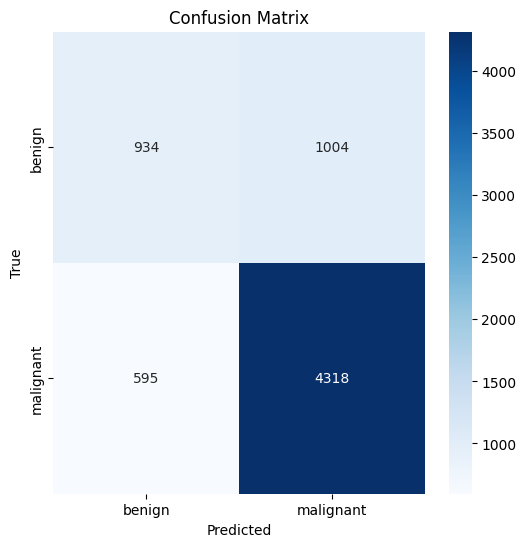

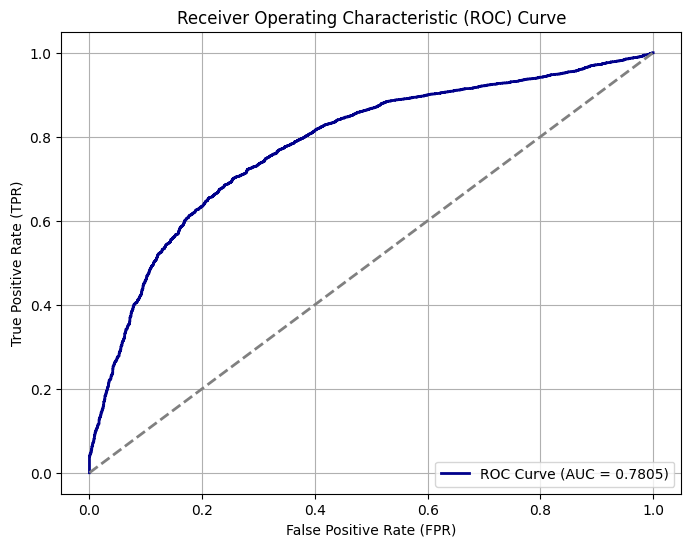

Specificity: 1.0000, Sensitivity: 0.0002, AUC: 0.7805

Test set: Average loss: 0.5207, Accuracy: 5252/6851 (76.66%)

Test set results - Accuracy: 76.66%, Loss: 0.5207, AUC: 0.7805


In [46]:
from sklearn import metrics  

test_accuracy, test_loss, test_auc = test(model, testloader)

print(f"Test set results - Accuracy: {test_accuracy:.2f}%, Loss: {test_loss:.4f}, AUC: {test_auc:.4f}")


## Reset50

In [36]:
import torch
import torch.nn as nn

# Custom ResNet50 class
class Resnet50(nn.Module):
    def __init__(self, num_classes=2):
        super(Resnet50, self).__init__()
        model_resnet50 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)

        self.conv1 = model_resnet50.conv1
        self.bn1 = model_resnet50.bn1
        self.relu = model_resnet50.relu
        self.maxpool = model_resnet50.maxpool
        self.layer1 = model_resnet50.layer1
        self.layer2 = model_resnet50.layer2
        self.layer3 = model_resnet50.layer3
        self.layer4 = model_resnet50.layer4
        self.avgpool = model_resnet50.avgpool
        self.__features = model_resnet50.fc.in_features
        
        self.fc = nn.Linear(self.__features, num_classes)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [51]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# EarlyStopping class
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pth', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'Early stopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model.')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transformAug = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomAffine(degrees=15, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Dataset and Dataloader
root_path = '/kaggle/input/classification-roi'

train_dataset = datasets.ImageFolder(f'{root_path}/train/', transform=transformAug)
val_dataset = datasets.ImageFolder(f'{root_path}/val/', transform=transform)
test_dataset = datasets.ImageFolder(f'{root_path}/test/', transform=transform)

batch_size = 32

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


# Custom ResNet50 Model (with BatchNorm and Dropout added)
class Resnet50(nn.Module):
    def __init__(self, num_classes=2):
        super(Resnet50, self).__init__()
        model_resnet50 = models.resnet50(pretrained=True)

        self.features = nn.Sequential(
            model_resnet50.conv1,
            model_resnet50.bn1,
            model_resnet50.relu,
            model_resnet50.maxpool,
            model_resnet50.layer1,
            model_resnet50.layer2,
            model_resnet50.layer3,
            model_resnet50.layer4,
            model_resnet50.avgpool
        )
        self.fc = nn.Sequential(
            nn.Linear(model_resnet50.fc.in_features, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x


# Training Function
def train(epoch, model, num_epochs, loader, criterion, optimizer):
    model.train()
    correct = 0
    total_loss = 0

    for data, label in tqdm(loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch'):
        data, label = data.to(device), label.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        pred = output.argmax(dim=1)
        correct += pred.eq(label).sum().item()

    accuracy = 100. * correct / len(loader.dataset)
    avg_loss = total_loss / len(loader)
    print(f'Train Loss: {avg_loss:.4f}, Train Accuracy: {accuracy:.2f}%')
    return avg_loss, accuracy


# Validation Function
def validate(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for data, label in loader:
            data, label = data.to(device), label.to(device)
            output = model(data)
            loss = criterion(output, label)
            total_loss += loss.item()

            preds = output.argmax(dim=1)
            correct += preds.eq(label).sum().item()
            all_labels.extend(label.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    avg_loss = total_loss / len(loader)
    accuracy = 100. * correct / len(loader.dataset)
    print(f'Validation Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    return avg_loss, accuracy, all_labels, all_preds


# Testing Function
def test(model, loader, criterion):
    model.eval()
    correct = 0
    total_loss = 0
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for data, label in loader:
            data, label = data.to(device), label.to(device)
            output = model(data)
            loss = criterion(output, label)
            total_loss += loss.item()

            probs = F.softmax(output, dim=1)[:, 1]
            preds = output.argmax(dim=1)
            correct += preds.eq(label).sum().item()

            all_labels.extend(label.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    avg_loss = total_loss / len(loader)
    accuracy = 100. * correct / len(loader.dataset)
    print(f'Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%')

    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    auc_value = roc_auc_score(all_labels, all_probs)
    specificity = 1 - fpr[1]
    sensitivity = tpr[1]

    print(f'Specificity: {specificity:.4f}, Sensitivity: {sensitivity:.4f}, AUC: {auc_value:.4f}')
    return avg_loss, accuracy, auc_value, specificity, sensitivity


# Initialize Model, Criterion, Optimizer, and Scheduler
model = Resnet50(num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

# EarlyStopping setup
early_stop = EarlyStopping(patience=20, verbose=True)

# Training and Validation Loop
num_epochs = 50
best_auc = 0
model_save_dir = os.path.join('/kaggle/working', 'tumor_classification', 'Resnet50')

if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)

for epoch in range(num_epochs):
    train_loss, train_acc = train(epoch, model, num_epochs, trainloader, criterion, optimizer)
    val_loss, val_acc, val_labels, val_preds = validate(model, valloader, criterion)

    scheduler.step()

    # Save Best Model
    best_model_path = os.path.join(model_save_dir, 'Resnet50_best.pth')
    if val_acc > best_auc:
        best_auc = val_acc
        torch.save(model.state_dict(), best_model_path)
        print(f"Best model saved with AUC: {best_auc:.4f}")

    early_stop(val_loss, model)
    if early_stop.early_stop:
        print("Early stopping")
        break

# Load Best Model and Test
if os.path.exists(best_model_path):
    model.load_state_dict(torch.load(best_model_path))
    print("Best model loaded successfully.")
else:
    print("No saved model found.")

test_loss, test_acc, test_auc, specificity, sensitivity = test(model, testloader, criterion)


Epoch 1/50: 100%|██████████| 639/639 [01:56<00:00,  5.49batch/s]

Train Loss: 0.6043, Train Accuracy: 72.32%


Validation Loss: 0.5046, Validation Accuracy: 79.49%
Best model saved with AUC: 79.4872
Validation loss decreased (inf --> 0.504646). Saving model.


Epoch 2/50: 100%|██████████| 639/639 [01:56<00:00,  5.48batch/s]

Train Loss: 0.5943, Train Accuracy: 72.20%


Validation Loss: 0.5533, Validation Accuracy: 78.58%
Early stopping counter: 1 out of 20


Epoch 3/50: 100%|██████████| 639/639 [01:56<00:00,  5.47batch/s]

Train Loss: 0.5916, Train Accuracy: 72.64%


Validation Loss: 0.4671, Validation Accuracy: 77.33%
Validation loss decreased (0.504646 --> 0.467108). Saving model.


Epoch 4/50: 100%|██████████| 639/639 [01:56<00:00,  5.46batch/s]

Train Loss: 0.5722, Train Accuracy: 73.00%


Validation Loss: 0.5129, Validation Accuracy: 81.05%
Best model saved with AUC: 81.0458
Early stopping counter: 1 out of 20


Epoch 5/50: 100%|██████████| 639/639 [01:56<00:00,  5.47batch/s]

Train Loss: 0.5669, Train Accuracy: 73.50%


Validation Loss: 0.4713, Validation Accuracy: 83.71%
Best model saved with AUC: 83.7104
Early stopping counter: 2 out of 20


Epoch 6/50: 100%|██████████| 639/639 [01:56<00:00,  5.47batch/s]

Train Loss: 0.5471, Train Accuracy: 74.35%


Validation Loss: 0.4159, Validation Accuracy: 83.66%
Validation loss decreased (0.467108 --> 0.415860). Saving model.


Epoch 7/50: 100%|██████████| 639/639 [01:57<00:00,  5.46batch/s]

Train Loss: 0.5315, Train Accuracy: 74.69%


Validation Loss: 0.4121, Validation Accuracy: 84.01%
Best model saved with AUC: 84.0121
Validation loss decreased (0.415860 --> 0.412132). Saving model.


Epoch 8/50: 100%|██████████| 639/639 [01:57<00:00,  5.46batch/s]

Train Loss: 0.5333, Train Accuracy: 74.37%


Validation Loss: 0.5121, Validation Accuracy: 78.78%
Early stopping counter: 1 out of 20


Epoch 9/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.5185, Train Accuracy: 74.74%


Validation Loss: 0.4554, Validation Accuracy: 79.14%
Early stopping counter: 2 out of 20


Epoch 10/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.4984, Train Accuracy: 76.08%


Validation Loss: 0.3991, Validation Accuracy: 82.15%
Validation loss decreased (0.412132 --> 0.399118). Saving model.


Epoch 11/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.4978, Train Accuracy: 76.09%


Validation Loss: 0.4068, Validation Accuracy: 81.75%
Early stopping counter: 1 out of 20


Epoch 12/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.4879, Train Accuracy: 76.53%


Validation Loss: 0.4077, Validation Accuracy: 83.01%
Early stopping counter: 2 out of 20


Epoch 13/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.4868, Train Accuracy: 76.30%


Validation Loss: 0.4333, Validation Accuracy: 81.80%
Early stopping counter: 3 out of 20


Epoch 14/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.4819, Train Accuracy: 76.90%


Validation Loss: 0.3740, Validation Accuracy: 85.02%
Best model saved with AUC: 85.0176
Validation loss decreased (0.399118 --> 0.374000). Saving model.


Epoch 15/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.4718, Train Accuracy: 76.99%


Validation Loss: 0.3925, Validation Accuracy: 83.81%
Early stopping counter: 1 out of 20


Epoch 16/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.4711, Train Accuracy: 77.71%


Validation Loss: 0.4488, Validation Accuracy: 78.03%
Early stopping counter: 2 out of 20


Epoch 17/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.4634, Train Accuracy: 78.14%


Validation Loss: 0.5181, Validation Accuracy: 78.28%
Early stopping counter: 3 out of 20


Epoch 18/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.4527, Train Accuracy: 78.64%


Validation Loss: 0.3432, Validation Accuracy: 86.43%
Best model saved with AUC: 86.4253
Validation loss decreased (0.374000 --> 0.343167). Saving model.


Epoch 19/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.4354, Train Accuracy: 79.97%


Validation Loss: 0.3189, Validation Accuracy: 86.38%
Validation loss decreased (0.343167 --> 0.318857). Saving model.


Epoch 20/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.4153, Train Accuracy: 81.00%


Validation Loss: 0.3580, Validation Accuracy: 85.02%
Early stopping counter: 1 out of 20


Epoch 21/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.4189, Train Accuracy: 80.78%


Validation Loss: 0.3139, Validation Accuracy: 84.67%
Validation loss decreased (0.318857 --> 0.313927). Saving model.


Epoch 22/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.3884, Train Accuracy: 82.29%


Validation Loss: 0.3226, Validation Accuracy: 86.27%
Early stopping counter: 1 out of 20


Epoch 23/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.3747, Train Accuracy: 83.18%


Validation Loss: 0.4620, Validation Accuracy: 77.22%
Early stopping counter: 2 out of 20


Epoch 24/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.3664, Train Accuracy: 83.53%


Validation Loss: 0.3914, Validation Accuracy: 82.50%
Early stopping counter: 3 out of 20


Epoch 25/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.3475, Train Accuracy: 84.79%


Validation Loss: 0.2886, Validation Accuracy: 87.58%
Best model saved with AUC: 87.5817
Validation loss decreased (0.313927 --> 0.288603). Saving model.


Epoch 26/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.3228, Train Accuracy: 85.75%


Validation Loss: 0.4869, Validation Accuracy: 77.58%
Early stopping counter: 1 out of 20


Epoch 27/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.3086, Train Accuracy: 86.65%


Validation Loss: 0.2993, Validation Accuracy: 86.78%
Early stopping counter: 2 out of 20


Epoch 28/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.2920, Train Accuracy: 87.48%


Validation Loss: 0.3005, Validation Accuracy: 86.38%
Early stopping counter: 3 out of 20


Epoch 29/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.2740, Train Accuracy: 88.16%


Validation Loss: 0.3266, Validation Accuracy: 85.22%
Early stopping counter: 4 out of 20


Epoch 30/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.2629, Train Accuracy: 88.69%


Validation Loss: 0.3219, Validation Accuracy: 86.27%
Early stopping counter: 5 out of 20


Epoch 31/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.2656, Train Accuracy: 88.62%


Validation Loss: 0.3150, Validation Accuracy: 86.48%
Early stopping counter: 6 out of 20


Epoch 32/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.2666, Train Accuracy: 88.57%


Validation Loss: 0.3112, Validation Accuracy: 86.17%
Early stopping counter: 7 out of 20


Epoch 33/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.2660, Train Accuracy: 88.47%


Validation Loss: 0.3121, Validation Accuracy: 86.68%
Early stopping counter: 8 out of 20


Epoch 34/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.2696, Train Accuracy: 88.38%


Validation Loss: 0.3486, Validation Accuracy: 85.17%
Early stopping counter: 9 out of 20


Epoch 35/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.2791, Train Accuracy: 88.01%


Validation Loss: 0.3223, Validation Accuracy: 85.72%
Early stopping counter: 10 out of 20


Epoch 36/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.2896, Train Accuracy: 87.36%


Validation Loss: 0.3628, Validation Accuracy: 84.01%
Early stopping counter: 11 out of 20


Epoch 37/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.3049, Train Accuracy: 86.72%


Validation Loss: 0.3804, Validation Accuracy: 85.17%
Early stopping counter: 12 out of 20


Epoch 38/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.3089, Train Accuracy: 86.48%


Validation Loss: 0.5055, Validation Accuracy: 76.67%
Early stopping counter: 13 out of 20


Epoch 39/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.3115, Train Accuracy: 86.58%


Validation Loss: 0.4052, Validation Accuracy: 81.80%
Early stopping counter: 14 out of 20


Epoch 40/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.3045, Train Accuracy: 86.72%


Validation Loss: 0.3597, Validation Accuracy: 83.16%
Early stopping counter: 15 out of 20


Epoch 41/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.3266, Train Accuracy: 86.04%


Validation Loss: 0.2783, Validation Accuracy: 89.29%
Best model saved with AUC: 89.2911
Validation loss decreased (0.288603 --> 0.278253). Saving model.


Epoch 42/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.3132, Train Accuracy: 86.21%


Validation Loss: 0.2663, Validation Accuracy: 88.94%
Validation loss decreased (0.278253 --> 0.266340). Saving model.


Epoch 43/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.2863, Train Accuracy: 87.55%


Validation Loss: 0.3944, Validation Accuracy: 81.65%
Early stopping counter: 1 out of 20


Epoch 44/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.2770, Train Accuracy: 87.93%


Validation Loss: 0.3680, Validation Accuracy: 82.76%
Early stopping counter: 2 out of 20


Epoch 45/50: 100%|██████████| 639/639 [01:57<00:00,  5.44batch/s]

Train Loss: 0.2660, Train Accuracy: 88.52%


Validation Loss: 0.3175, Validation Accuracy: 85.77%
Early stopping counter: 3 out of 20


Epoch 46/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.2425, Train Accuracy: 89.64%


Validation Loss: 0.2771, Validation Accuracy: 87.13%
Early stopping counter: 4 out of 20


Epoch 47/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.2269, Train Accuracy: 90.38%


Validation Loss: 0.3213, Validation Accuracy: 84.62%
Early stopping counter: 5 out of 20


Epoch 48/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.2158, Train Accuracy: 90.90%


Validation Loss: 0.3155, Validation Accuracy: 85.32%
Early stopping counter: 6 out of 20


Epoch 49/50: 100%|██████████| 639/639 [01:57<00:00,  5.45batch/s]

Train Loss: 0.1980, Train Accuracy: 91.49%


Validation Loss: 0.3233, Validation Accuracy: 85.22%
Early stopping counter: 7 out of 20


Epoch 50/50: 100%|██████████| 639/639 [01:57<00:00,  5.46batch/s]

Train Loss: 0.1976, Train Accuracy: 91.75%


Validation Loss: 0.3064, Validation Accuracy: 86.12%
Early stopping counter: 8 out of 20
Best model loaded successfully.


/tmp/ipykernel_30/585703242.py:240: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Test Loss: 0.6622, Test Accuracy: 75.61%
Specificity: 1.0000, Sensitivity: 0.0006, AUC: 0.7889


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_30/2837993988.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detai

              precision    recall  f1-score   support

      benign     0.6278    0.3385    0.4398      1938
   malignant     0.7792    0.9208    0.8441      4913

    accuracy                         0.7561      6851
   macro avg     0.7035    0.6297    0.6420      6851
weighted avg     0.7364    0.7561    0.7297      6851



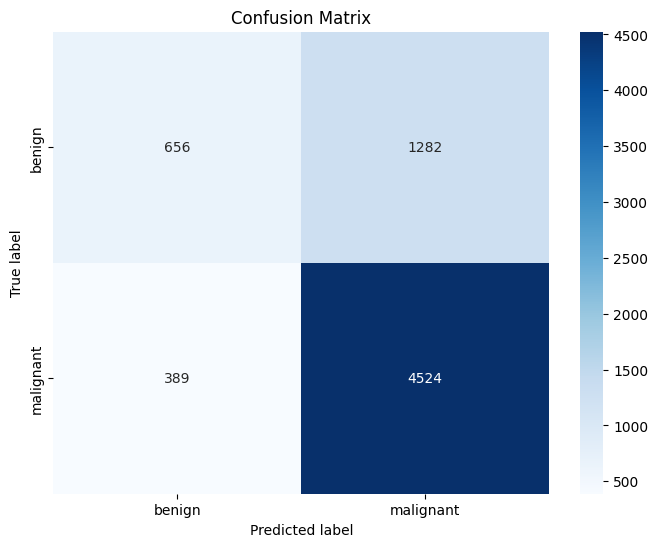

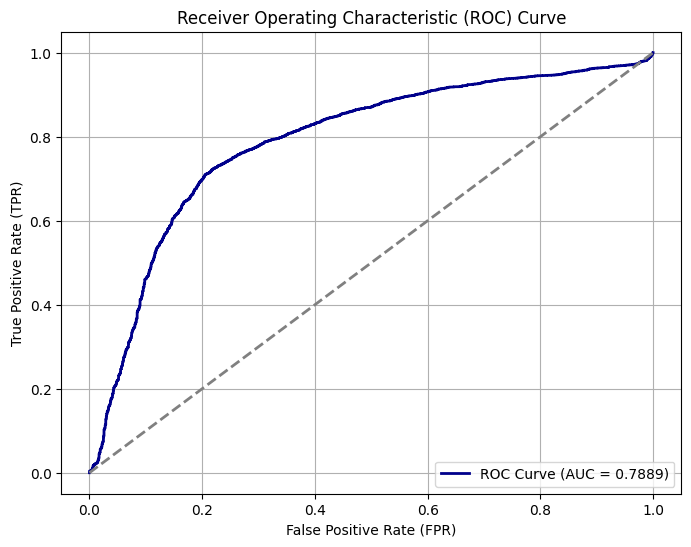

Specificity: 1.0000, Sensitivity: 0.0006, AUC: 0.7889

Test set: Average loss: 0.6649, Accuracy: 5180/6851 (75.61%)

Test set results - Accuracy: 75.61%, Loss: 0.6649, AUC: 0.7889


In [67]:
import torch
import torch.nn as nn
from torchvision import models

criterion = nn.CrossEntropyLoss()

model = Resnet50(num_classes=2).to(device)

model_path = '/kaggle/working/tumor_classification/Resnet50/Resnet50_best.pth'
model.load_state_dict(torch.load(model_path))

model.eval()

test_accuracy, test_loss, test_auc = test(model, testloader, criterion)

print(f"Test set results - Accuracy: {test_accuracy:.2f}%, Loss: {test_loss:.4f}, AUC: {test_auc:.4f}")
